In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import find_peaks, savgol_filter
import pickle

from pathlib import Path

In [20]:
# Data can be recovered through the very first branch in flygym
data_path = Path.cwd() / "output/kinematic_replay/walking/friction1_gravity-981000.0_stiff2500"
joint_angles_path = Path.cwd() / "data/joint_tracking/walking/fly1/df3d/joint_angles__210902_PR_Fly1.pkl"

contact_data = pd.read_csv(data_path / 'contact_data.csv')
position_data = pd.read_csv(data_path / 'position_data.csv', header=[0,1])

zero_nan_pos_data = position_data.copy().replace(0, np.nan)

In [21]:
position_data

body Animat/LFTarsus1                          Animat/LFTarsus2  \
     coordinate                x           y            z                x   
0             0      1467.830487  148.911573  1311.320041      1685.923314   
1             1      1468.598511  151.452997  1308.066954      1687.671830   
2             2      1469.097325  155.342571  1304.821277      1689.079651   
3             3      1469.333240  160.583196  1301.511963      1690.142769   
4             4      1469.288583  167.174394  1298.154145      1690.838599   
...         ...              ...         ...          ...              ...   
9995       9995      8822.839917  601.139711   253.267643      8985.546136   
9996       9996      8822.879837  600.995232   253.104587      8985.507062   
9997       9997      8822.934369  600.856135   252.955405      8985.483318   
9998       9998      8823.001703  600.720750   252.818130      8985.473043   
9999       9999      8823.079495  600.588545   252.691489      8985.473746   

                              Animat/LFTarsus3                           ...  \
               y            z                x           y            z  ...   
0     148.335976  1368.708702      1832.774823  148.542195  1413.976327  ...   
1     151.367727  1361.593998      1834.022531  151.987091  1408.451812  ...   
2     156.003457  1354.476190      1835.395259  157.222427  1401.431733  ...   
3     162.255604  1347.322721      1836.575725  164.263732  1393.883684  ...   
4     170.129328  1340.167594      1837.382026  173.123656  1386.326277  ...   
...          ...          ...              ...         ...          ...  ...   
9995  727.033306   160.878466      9099.507564  814.672133   106.594076  ...   
9996  726.918502   160.616823      9099.454018  814.586904   106.349810  ...   
9997  726.810750   160.372766      9099.415058  814.509672   106.123123  ...   
9998  726.707684   160.143285      9099.391137  814.438494   105.916546  ...   
9999  726.608241   159.926117      9099.381029  814.372409   105.730657  ...   

     Animat/RMTarsus2 Animat/RMTarsus3                           \
                    z                x            y           z   
0          124.773304       -94.472650  -809.302224  -34.103088   
1          129.352308       -94.292908  -815.626627  -29.496924   
2          136.145017       -93.889349  -821.511828  -22.378099   
3          144.235844       -93.328857  -825.855960  -13.584951   
4          152.113663       -92.219236  -828.710341   -4.883081   
...               ...              ...          ...         ...   
9995       484.675844      8264.600822 -1595.112513  431.971992   
9996       485.552202      8269.053969 -1594.414929  432.992384   
9997       486.384839      8273.467849 -1593.700000  433.955174   
9998       487.177441      8277.840897 -1592.967434  434.864607   
9999       487.932759      8282.171555 -1592.216908  435.724273   

     Animat/RMTarsus4                          Animat/RMTarsus5               \
                    x            y           z                x            y   
0         -103.345125  -796.176920 -125.171891      -109.777974  -789.146949   
1         -103.030358  -798.572397 -119.925524      -109.389026  -789.400812   
2         -102.451030  -800.976714 -112.097261      -108.704963  -789.605547   
3         -101.717373  -803.267949 -102.825838      -107.849585  -789.979998   
4         -100.425208  -806.047159  -94.121881      -106.398806  -791.353442   
...               ...          ...         ...              ...          ...   
9995      8304.311934 -1672.763061  401.346165      8331.250639 -1727.194567   
9996      8308.965179 -1671.996120  402.451011      8336.041599 -1726.380238   
9997      8313.576979 -1671.208955  403.489772      8340.789610 -1725.544156   
9998      8318.145886 -1670.400909  404.465822      8345.493410 -1724.685046   
9999      8322.670282 -1669.571590  405.382428      8350.151441 -1723.802124   

                  
               z  
0   

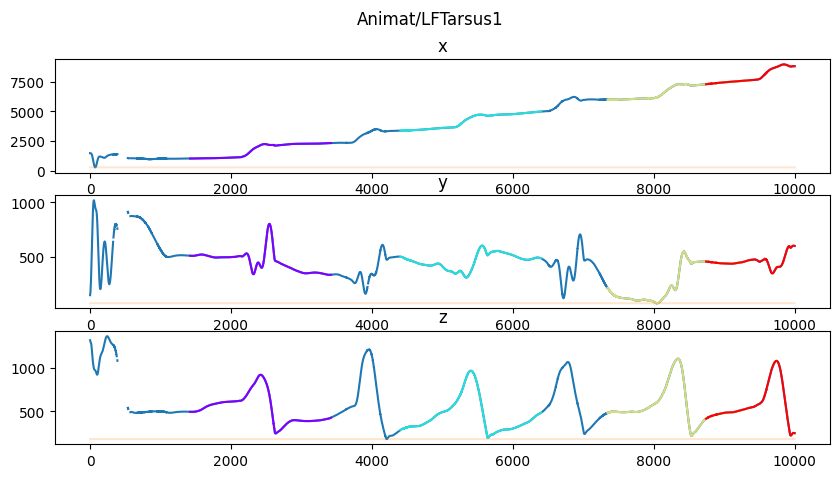

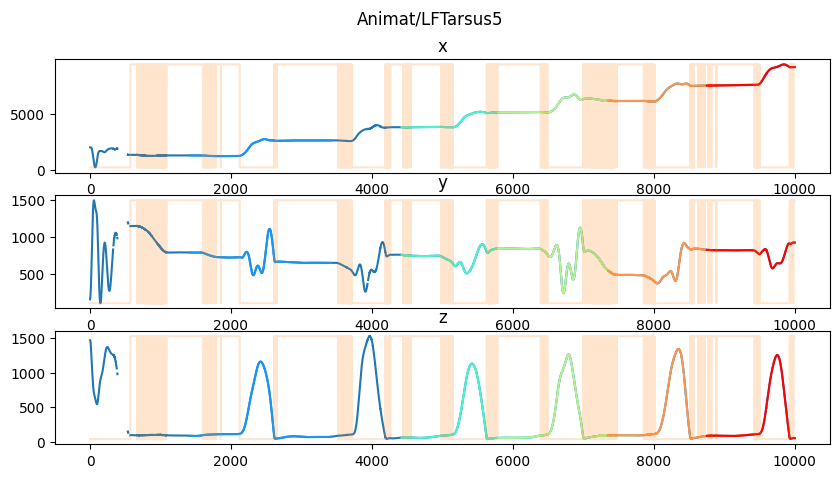

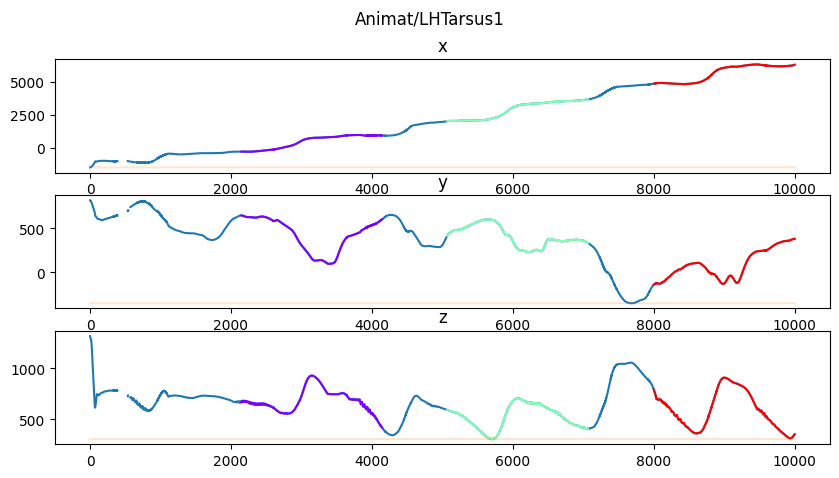

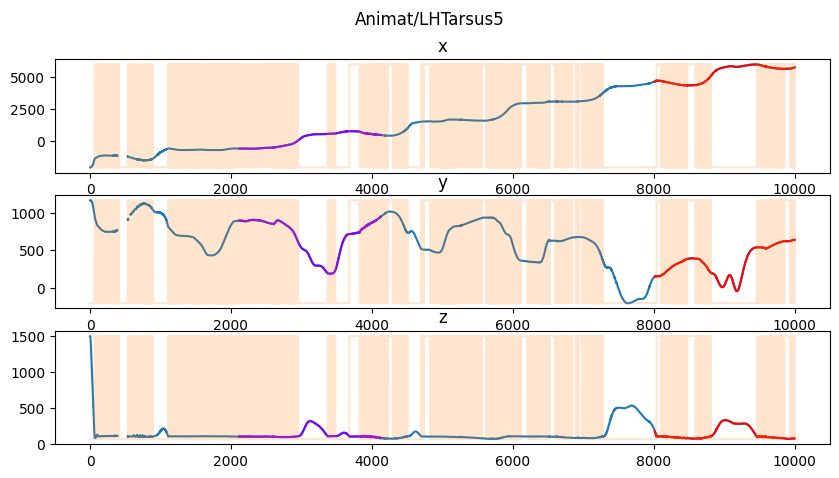

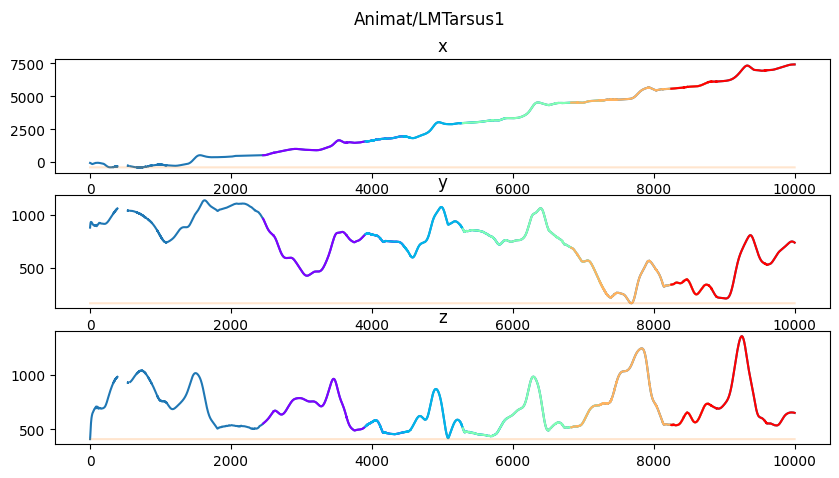

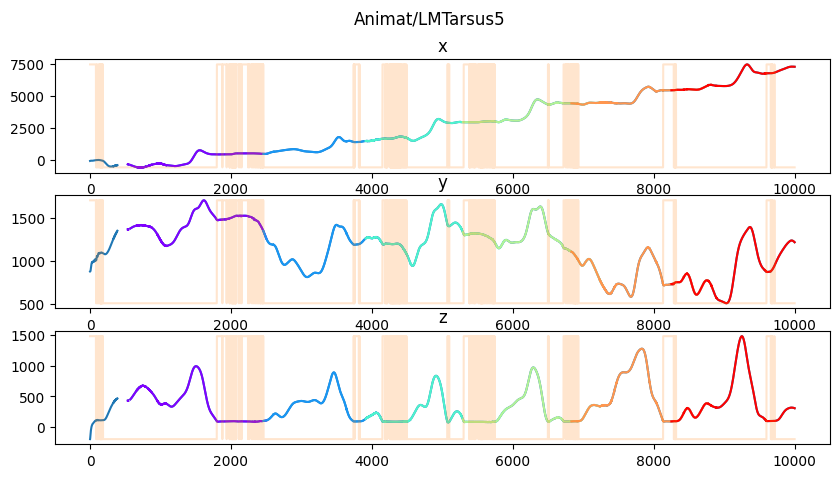

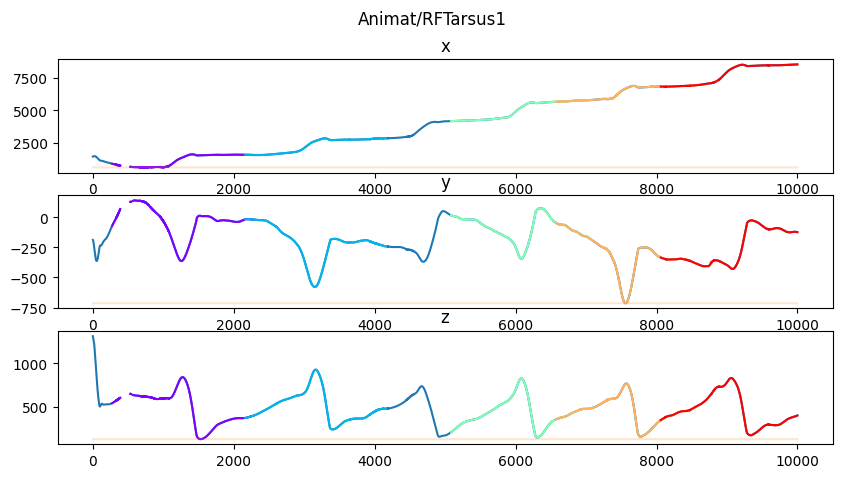

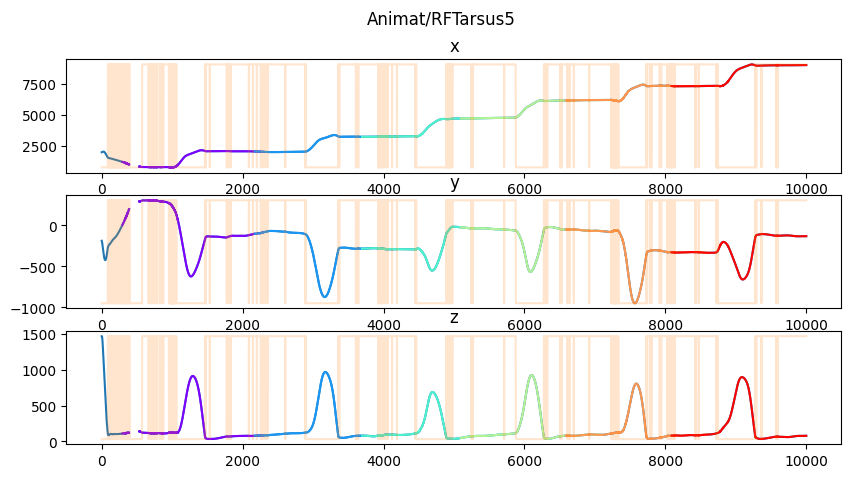

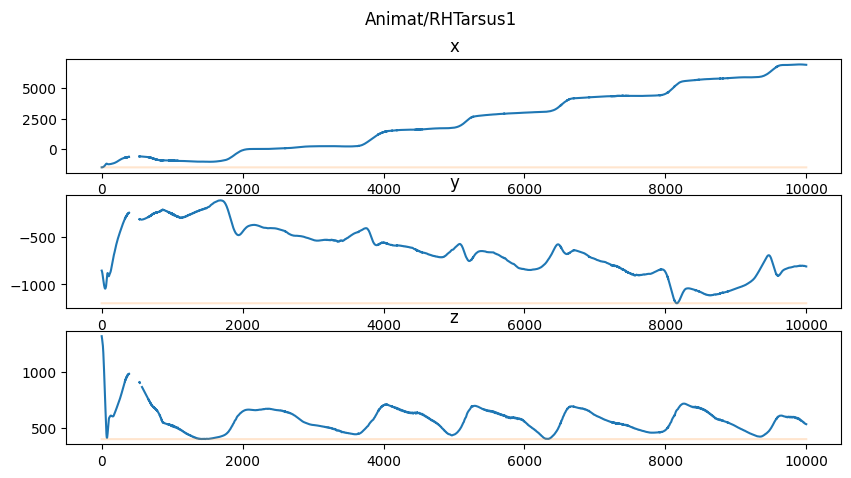

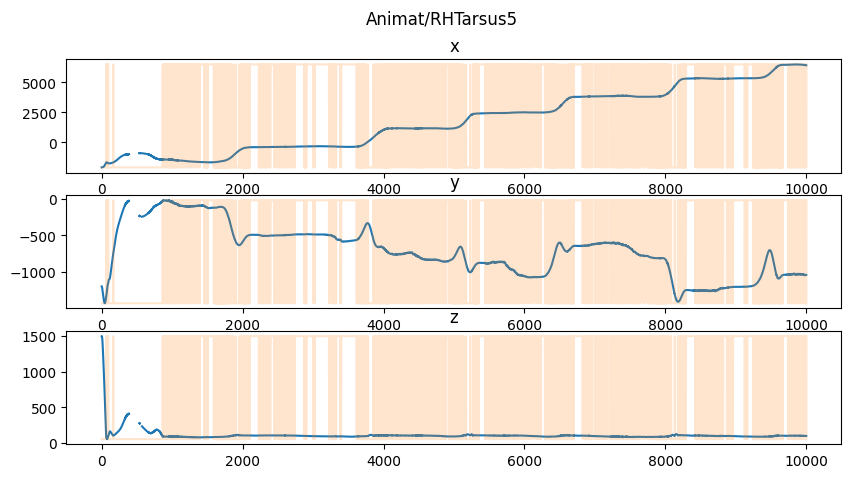

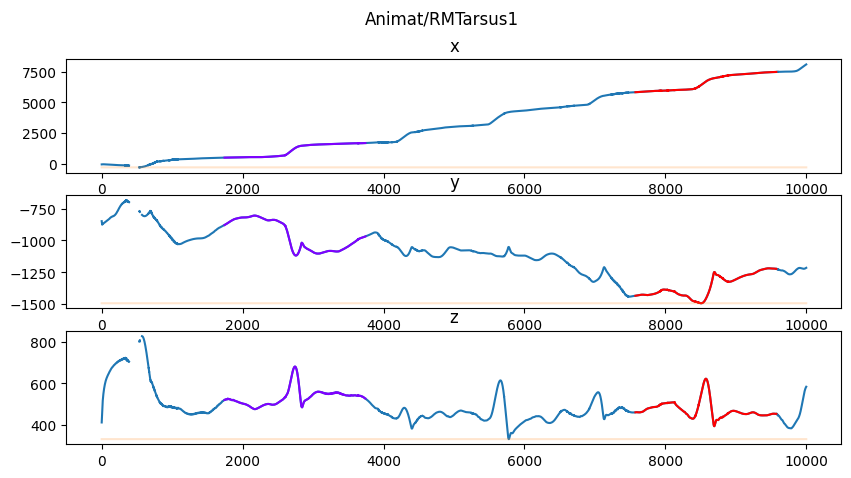

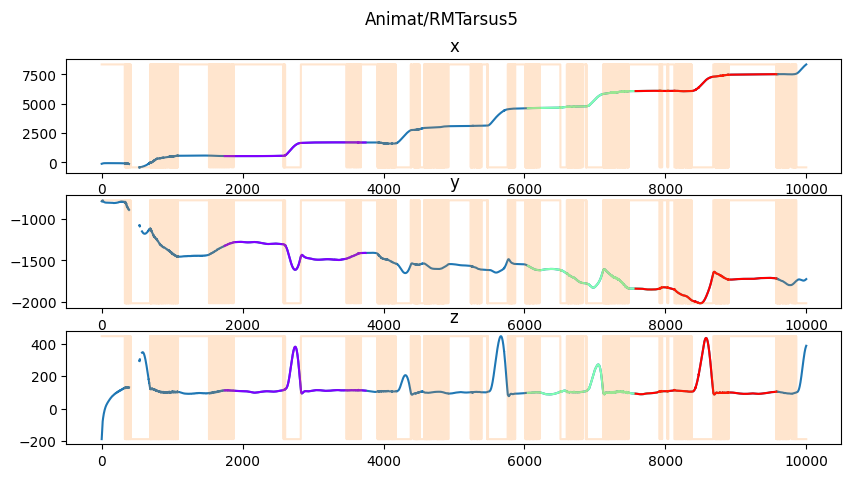

In [22]:
keypoint = "Animat/LFTarsus5"

t = np.arange(len(zero_nan_pos_data))
#plot each peak in a different color


for keypoint in zero_nan_pos_data.columns.levels[0]:
    if "5" in keypoint or "1" in keypoint:
        peaks = find_peaks(zero_nan_pos_data[keypoint, "z"], distance=1000, prominence=100)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(peaks[0])))
        fig, axs = plt.subplots(3, 1, figsize=(10, 5))
        for i , pos in enumerate(["x", "y", "z"]):

            keypoint_pos_data = zero_nan_pos_data[keypoint, pos]
            axs[i].plot(t, keypoint_pos_data)
            window = 1000

            for peak, c in zip(peaks[0], colors):
                axs[i].plot(t[peak-window:peak+window], keypoint_pos_data[peak-window:peak+window], color=c)
            axs[i].set_title(pos)
            scaling = keypoint_pos_data.max() - keypoint_pos_data.min()
            axs[i].plot(contact_data[keypoint]*scaling + keypoint_pos_data.min(), alpha=0.2)
        plt.suptitle(keypoint)
        plt.show()



# Select the data

- Induce artificial left right symmetry
- Select on collision as time locked with rise of the leg 
- Select for the plateau before and after the peak as similar as possible

In [23]:
keypoint = "Animat/RFTarsus5"

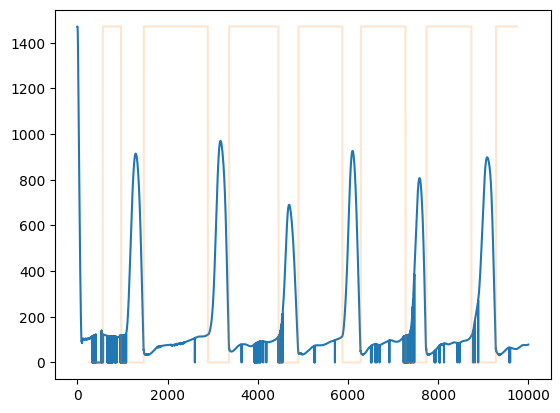

In [24]:
# filter the high frequencies in the contact data
# median filter with window size 100
contact_data_filtered = contact_data.copy()
contact_data_filtered = contact_data_filtered.rolling(501, center=True).median()

pos_data = position_data[keypoint, "z"]
plt.plot(pos_data)
scaling = pos_data.max() - pos_data.min()

plt.plot(contact_data_filtered[keypoint]*scaling + pos_data.min(), alpha=0.2)

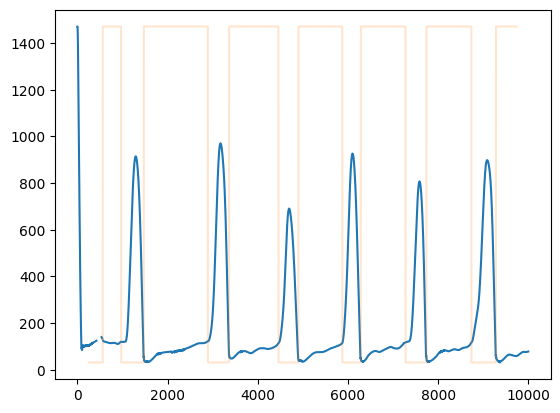

In [25]:
# Remove zeros and interpolate
position_data_clean = position_data.copy().replace(0, np.nan).interpolate(limit=10)

pos_data = position_data_clean[keypoint, "z"]
plt.plot(pos_data)
scaling = pos_data.max() - pos_data.min()

plt.plot(contact_data_filtered[keypoint]*scaling + pos_data.min(), alpha=0.2)

## Check the timelock of the collision and the lift off of the leg

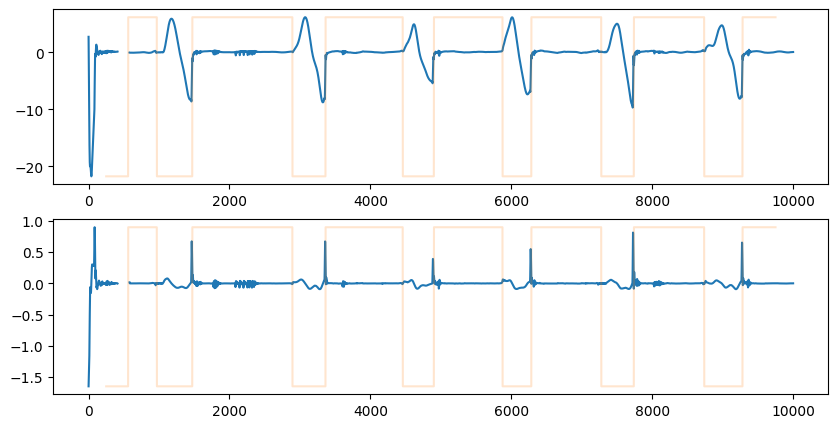

In [26]:
# differentiate the position data
velocity_data_clean = position_data_clean.apply(lambda x: savgol_filter(x, window_length=20, polyorder=3, deriv=1), axis=0)
acceleration_data_clean = position_data_clean.apply(lambda x: savgol_filter(x, window_length=20, polyorder=3, deriv=2), axis=0)
vel_data = velocity_data_clean[keypoint, "z"]
accel_data  = acceleration_data_clean[keypoint, "z"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

ax1.plot(vel_data)
scaling_vel = vel_data.max() - vel_data.min()
ax1.plot(contact_data_filtered[keypoint]*scaling_vel + vel_data.min(), alpha=0.2)

ax2.plot(accel_data)
scaling_accel = accel_data.max() - accel_data.min()
ax2.plot(contact_data_filtered[keypoint]*scaling_accel + accel_data.min(), alpha=0.2)



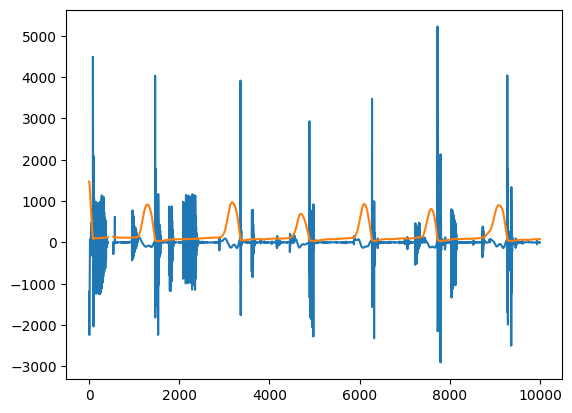

In [27]:
plt.plot(np.diff(np.diff(pos_data))*max(pos_data))
plt.plot(pos_data)

## Look at foreleg traces

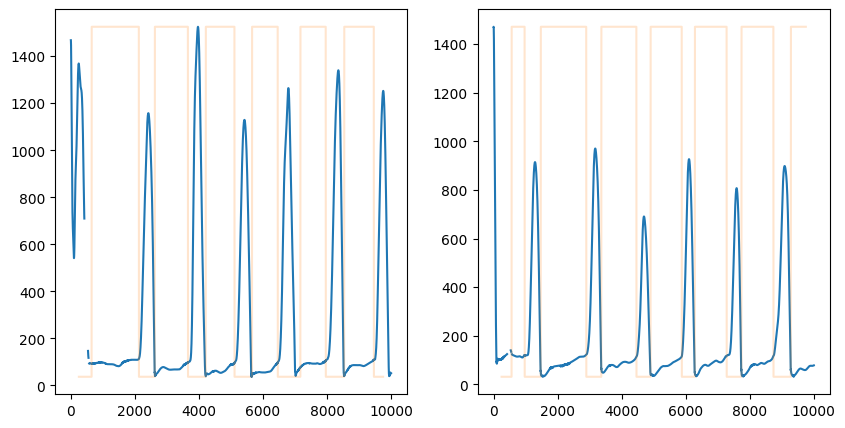

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
flat_axs = axs.flatten()
for keypoint, ax in zip(["Animat/LFTarsus5", "Animat/RFTarsus5"], flat_axs):
    pos_data = position_data_clean[keypoint, "z"]

    ax.plot(pos_data)
    scaling = pos_data.max() - pos_data.min()
    ax.plot(contact_data_filtered[keypoint]*scaling + pos_data.min(), alpha=0.2)



[ 245 2419 3969 5420 6791 8352 9753]
0 1453 3655 5108


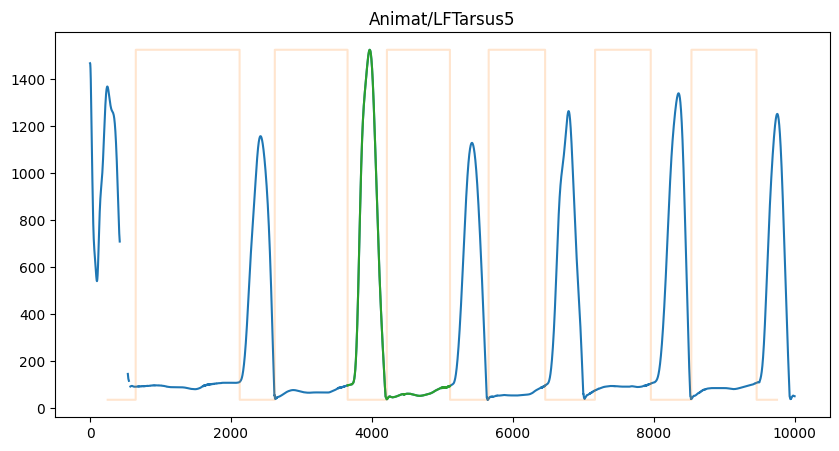

[1293 3174 4695 6102 7587 9087]
0 1566 2893 4459
Kept Left peak


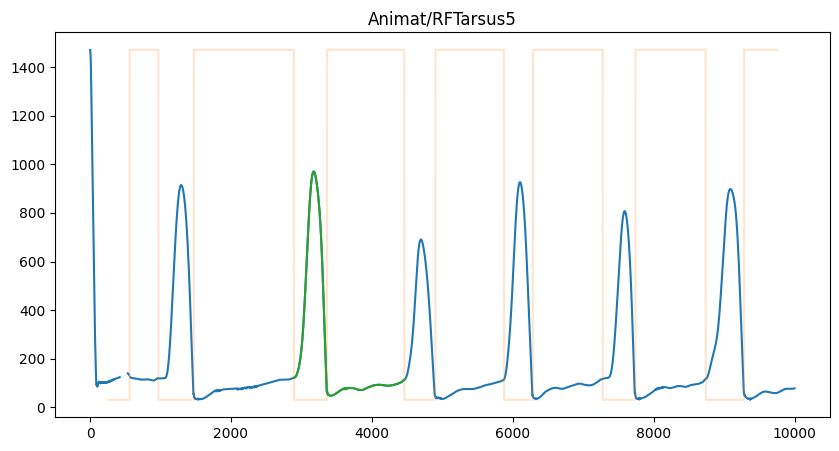

[1503 3459 4910 6291 7831 9250]
0 3595 5655 9250
1 2176 5655 7831
2 889 1503 2392
No suitable peak found


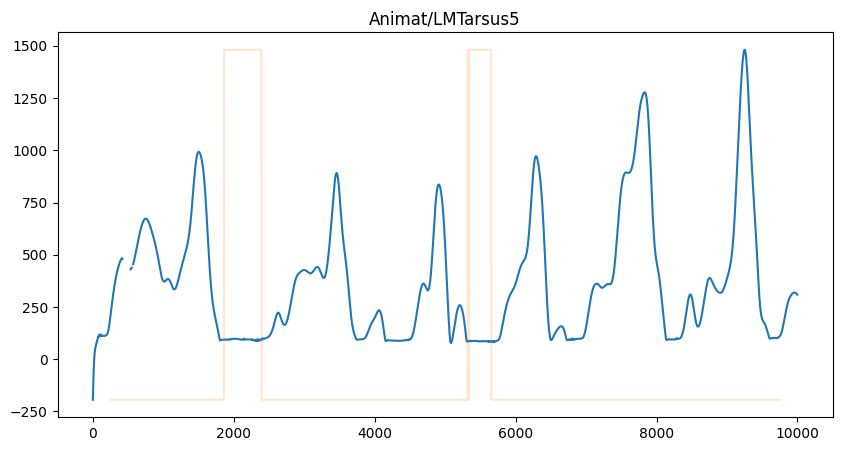

[2746 4310 5665 7048 8577]
0 1273 5436 6709
Kept Right peak


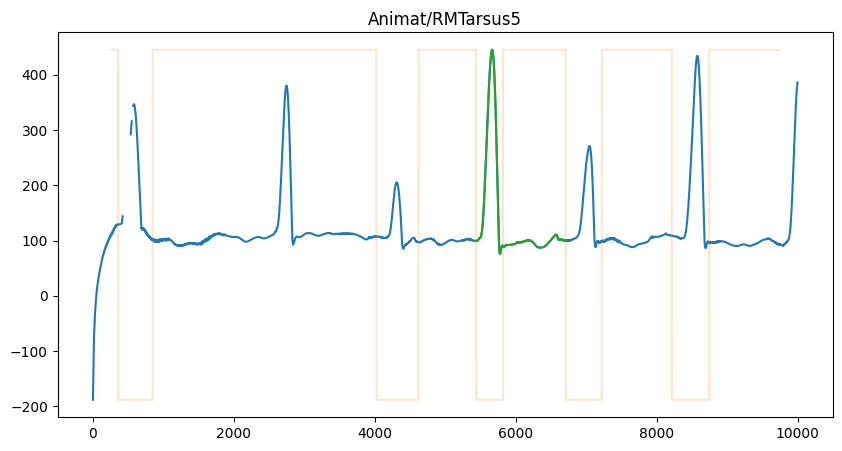

[1044 3123 4620 7687 9015]
0 1539 7175 8714


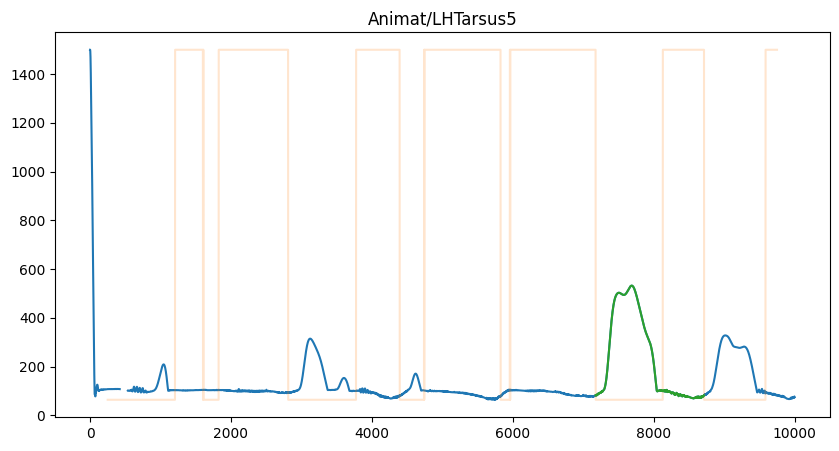

No peak found
No suitable peak found
Kept Left peak


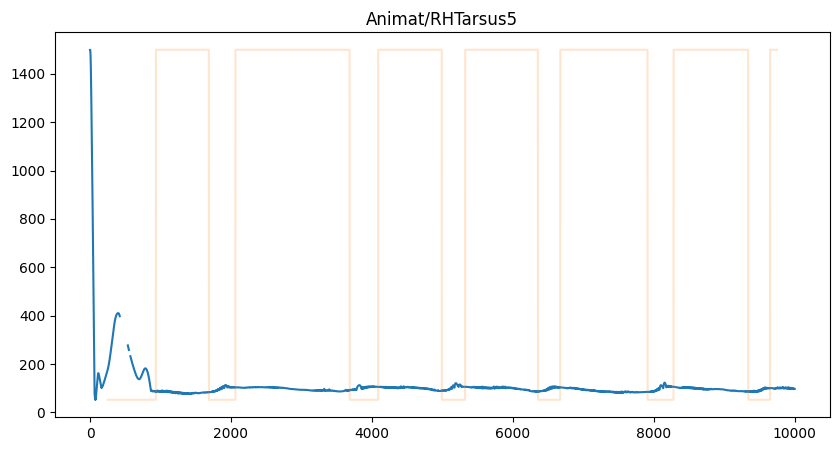

In [29]:
keypoint = "Animat/LFTarsus5"
old_start_cycle = 0
old_end_cyle = 0
old_max_val = 0
keypoints_taken = []

all_start_cycles = []
all_end_cycles = []

for location in ["F", "M", "H"]:
    old_start_cycle = 0
    old_end_cyle = 0
    old_max_val = 0
    for side in ["L", "R"]:
        keypoint = f"Animat/{side}{location}Tarsus5"
        zpos_data = position_data_clean[keypoint, "z"].values
        contact_data = contact_data_filtered[keypoint].values

        # Get the indices of the peak with highest amplitude subsequent plateau
        # Plateau should be between 1000 and 2000 steps long (measure for 3 peaks with highest amplitude)
        peaks =  find_peaks(zpos_data, distance=1000, prominence=100)
        peaks_ids = peaks[0]
        if len(peaks_ids) > 0:
            print(peaks_ids)
            dur = 0
            k = 0
            while (dur < 1000 or dur > 2000) and k < 3:
                if k > 0:
                    peaks_ids = np.delete(peaks_ids, id_max_peak)
                id_max_peak = np.nanargmax(zpos_data[peaks_ids])
                max_peak_id = peaks_ids[id_max_peak]
                max_val = zpos_data[max_peak_id]
                start_cycle = max_peak_id - np.nanargmax(contact_data[:max_peak_id][::-1])
                next_stance_start = max_peak_id + np.nanargmax(contact_data[max_peak_id:])
                end_cycle = next_stance_start + np.nanargmax(np.logical_not(contact_data[next_stance_start:]))
                dur = end_cycle - start_cycle
                print(k, dur, start_cycle, end_cycle)
                k += 1     
        else:
            k = 3
            print("No peak found")

        if k > 2:
            max_val_old = 0
            max_val = 0
            print("No suitable peak found")
    
        if side == "R":
            if old_max_val > max_val:
                all_start_cycles.append(old_start_cycle)
                all_end_cycles.append(old_end_cyle)
                keypoints_taken.append(f"Animat/L{location}Tarsus5")
                print("Kept Left peak")
            else:
                all_start_cycles.append(start_cycle)
                all_end_cycles.append(end_cycle)
                keypoints_taken.append(keypoint)
                print("Kept Right peak")
        
        old_max_val = max_val
        old_start_cycle = start_cycle
        old_end_cyle = end_cycle

        # Visualize
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        t = np.arange(len(zpos_data))
        ax.plot(t, zpos_data)
        scaling = np.nanmax(zpos_data) - np.nanmin(zpos_data)
        ax.plot(t, contact_data_filtered[keypoint]*scaling + np.nanmin(zpos_data), alpha=0.2)
        if k < 3:
            ax.plot(t[start_cycle:end_cycle], zpos_data[start_cycle:end_cycle])
        ax.set_title(keypoint)
        plt.show()

# Engineer the data

- Load stepping data
- Use selected pieces
- Interpolate to close trajectories
- Generate x steps with tripod delay

In [30]:
########## Joint Angles Matching ##########
joint_names_correspondence = {'ThC': 'Coxa',
                              'CTr': 'Femur',
                              'FTi': 'Tibia',
                              'TiTa': 'Tarsus1'}

# Load angle data
def load_joint_angles(path, actuated_joints, time_step, pybullet_time_step, starting_time, run_time):
    """
    Load joint angles from a file
    Read in the dictionary of joint angles and order them in an array ordered by actuated joints
    Crop the data between the starting and ending times
    Interpolate the joint angles to the simulation time step

    :param run_time: 
    :param pybullet_time_step:
    :param actuated_joints:
    :param path:
    :param time_step:
    :param starting_time:
    :return:
    """
    pybullet_joint_angles = np.load(path, allow_pickle=True)
    n_joints_data = len([leg + joint for leg in pybullet_joint_angles for joint in pybullet_joint_angles[leg]])

    assert len(actuated_joints) == n_joints_data, (f"Number of joints in the data ({n_joints_data}) does not "
                                                   f"match the number of actuated joints ({len(actuated_joints)})")

    end_time = starting_time + run_time
    simulation_time = np.arange(0, run_time, time_step)
    pybullet_time = np.arange(0, run_time, pybullet_time_step)

    joint_angles = np.zeros((len(actuated_joints), int(run_time / time_step)))
    for leg in pybullet_joint_angles:
        for joint in pybullet_joint_angles[leg]:
            split_joint = joint.split('_')
            matching_joint = f"joint_{leg[:2]}{joint_names_correspondence[split_joint[0]]}"
            if not "pitch" in split_joint:
                matching_joint += f"_{split_joint[1]}"

            selected_joint_angles = pybullet_joint_angles[leg][joint][int(starting_time / pybullet_time_step):
                                                                      int(end_time / pybullet_time_step)]
            joint_angles[actuated_joints.index(matching_joint)] = np.interp(simulation_time,
                                                                            pybullet_time,
                                                                            selected_joint_angles)

    return joint_angles

run_time = 1.0
data_time_step = 5e-4
time_step = 1e-4
starting_time = 3.0

# Paths for data
angles_path = joint_angles_path
kin_replay_leg_dofs = [
    f'joint_{side}{pos}{dof}'
    for side in 'LR'
    for pos in 'FMH'
    for dof in ['Coxa', 'Coxa_roll', 'Coxa_yaw',
                'Femur', 'Femur_roll',
                'Tibia',
                'Tarsus1']
]

joint_angles = load_joint_angles(angles_path, kin_replay_leg_dofs, time_step, data_time_step, starting_time,
                                     run_time)

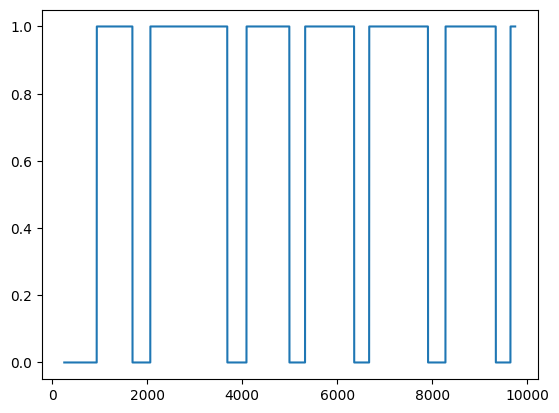

In [31]:
plt.plot(contact_data)
plt.show()

joint_LFCoxa 1453
joint_LFCoxa_roll 1453
joint_LFCoxa_yaw 1453
joint_LHCoxa 1539
joint_LHCoxa_roll 1539
joint_LHCoxa_yaw 1539
joint_RMCoxa 1273
joint_RMCoxa_roll 1273
joint_RMCoxa_yaw 1273


['FCoxa',
 'FCoxa_roll',
 'FCoxa_yaw',
 'FFemur',
 'FFemur_roll',
 'FTibia',
 'FTarsus1',
 'HCoxa',
 'HCoxa_roll',
 'HCoxa_yaw',
 'HFemur',
 'HFemur_roll',
 'HTibia',
 'HTarsus1',
 'MCoxa',
 'MCoxa_roll',
 'MCoxa_yaw',
 'MFemur',
 'MFemur_roll',
 'MTibia',
 'MTarsus1']

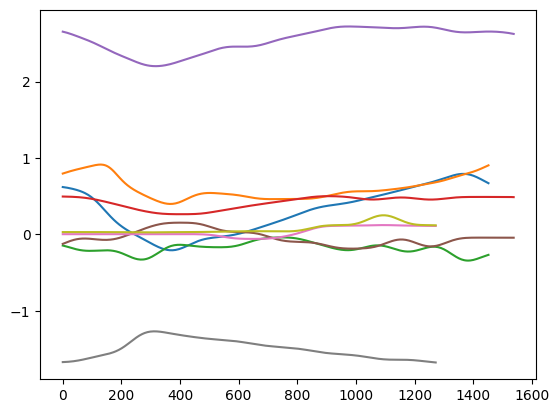

In [32]:
#step_max_len = max()   


step_joint_data = []
stepping_joint = []
stance_or_swing_joint = []

for joint in kin_replay_leg_dofs:
    for i, kpt in enumerate(keypoints_taken):
        #print(kpt[7:9], joint)
        if kpt[7:9] in joint:
            step_joint_data.append(joint_angles[kin_replay_leg_dofs.index(joint)][all_start_cycles[i]:all_end_cycles[i]])
            if "Coxa" in joint:
                plt.plot(joint_angles[kin_replay_leg_dofs.index(joint)][all_start_cycles[i]:all_end_cycles[i]])
                print(joint, len(joint_angles[kin_replay_leg_dofs.index(joint)][all_start_cycles[i]:all_end_cycles[i]]))
            stepping_joint.append(joint[7:])
        

stepping_joint

0.1549

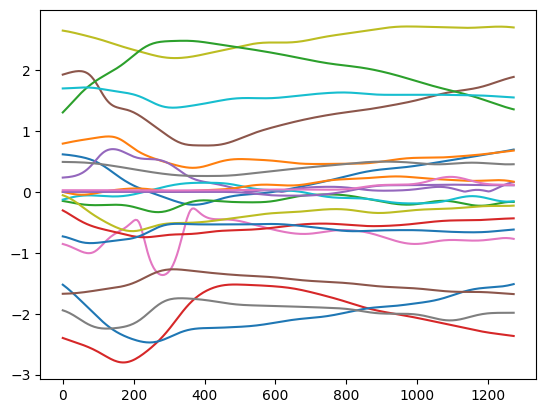

In [34]:
# Traces seem time locked thus only crop all to the shortest
step_min_len = min([end - start for start, end in zip(all_start_cycles, all_end_cycles)])

for i in range(len(step_joint_data)):
    step_joint_data[i] = step_joint_data[i][:step_min_len]

plt.plot(np.transpose(step_joint_data))
plt.show()

Additional timesteps: 12
0.6192273147041275 0.6192273147041275
0.7957581557760842 0.7957581557760842
-0.14641467027256003 -0.14641467027256003
-2.398246212238081 -2.398246212238081
0.23751080299876498 0.23751080299876498
1.929982298748201 1.929982298748201
-0.8534511881630316 -0.8534511881630316
0.4950549902860131 0.4950549902860131
2.6531774565425605 2.6531774565425605
-0.12471789284252464 -0.12471789284252464
-1.5225550283601883 -1.5225550283601883
0.004149120388304704 0.004149120388304704
1.308198286245169 1.308198286245169
-0.3019542530069206 -0.3019542530069206
0.0021299940393221324 0.0021299940393221324
-1.6721142217915994 -1.6721142217915994
0.029753366800449436 0.029753366800449436
-1.943840200712773 -1.943840200712773
-0.05294122195774727 -0.05294122195774727
1.7024682603665142 1.7024682603665142
-0.7287434536162088 -0.7287434536162088


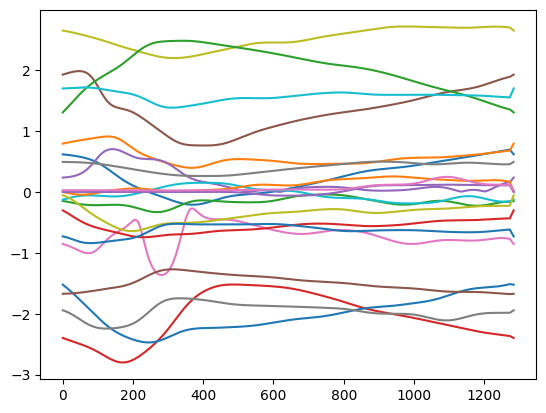

In [35]:
# Interpolate between beginning and end
additional_timesteps_percentage = 0.01
additional_timesteps = int(additional_timesteps_percentage * step_min_len)
print(f"Additional timesteps: {additional_timesteps}")

step_joint_data_interpolated = []
stance_or_swing_joint_interpolated = []

for i in range(len(step_joint_data)):
    step_joint_data_interpolated.append(np.concatenate([step_joint_data[i],
                                         np.linspace(step_joint_data[i][-1], step_joint_data[i][0], additional_timesteps)])
                                         )
    print(step_joint_data_interpolated[i][0], step_joint_data_interpolated[i][-1])

plt.plot(np.transpose(step_joint_data_interpolated))
plt.show()

In [36]:
keypoints_taken

['Animat/LFTarsus5', 'Animat/RMTarsus5', 'Animat/LHTarsus5']

joint_LMCoxa_roll
joint_LMCoxa_yaw
joint_LMFemur_roll
joint_RFCoxa_roll
joint_RFCoxa_yaw
joint_RFFemur_roll
joint_RHCoxa_roll
joint_RHCoxa_yaw
joint_RHFemur_roll


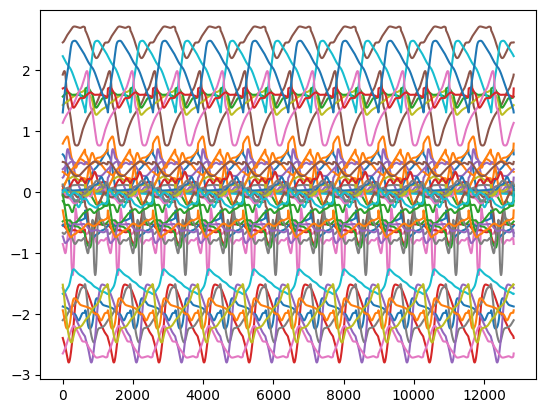

In [37]:
# Generate fictive tripod gait
# Hind, front and contralateral mid leg are out of phase with their contralateral counterparts

# Generate tripod gait

n_steps = 10
tripod_data = []

sides_taken = [key[7:9] for key in keypoints_taken]

for joint in kin_replay_leg_dofs:
    base_data = step_joint_data_interpolated[stepping_joint.index(joint[7:])]
    if not joint[6:8] in sides_taken and ("roll" in joint or "yaw" in joint):
        print(joint)
        base_data = -1*base_data
    if "LM" in joint or "RF" in joint or "LH" in joint:
        len_base_data = len(base_data)
        tripod_data.append(np.tile(base_data, n_steps+1)[int(np.floor(len_base_data/2)):-int(np.ceil(len_base_data/2))])
    else:
        tripod_data.append(np.tile(base_data, n_steps))

plt.plot(np.transpose(tripod_data))
plt.show()

joint_LFCoxa 0.3513569373452734 0.6192273147041275
joint_LFCoxa_roll 0.6160586362544332 0.7957581557760842
joint_LFCoxa_yaw -0.14937745098494093 -0.14641467027256003


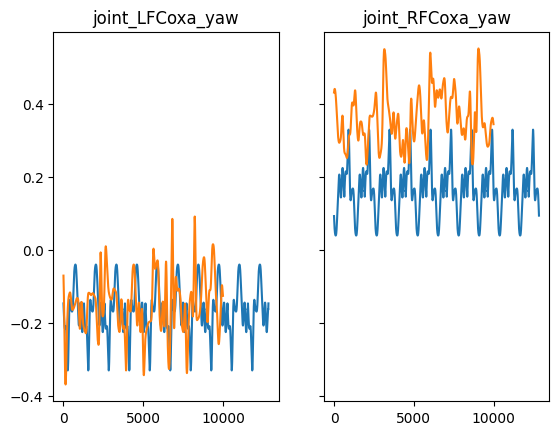

joint_LFFemur -2.1309672128219748 -2.398246212238081
joint_LFFemur_roll 0.18532006854068908 0.23751080299876498
joint_LFTibia 1.43144316164253 1.929982298748201
joint_LFTarsus1 -0.6651975415337179 -0.8534511881630316
joint_LMCoxa 0.08396741179413013 -0.05948391966926299
joint_LMCoxa_roll 1.837110932954579 1.429250097687312
joint_LMCoxa_yaw 0.049819231483677354 -0.04136831704779592


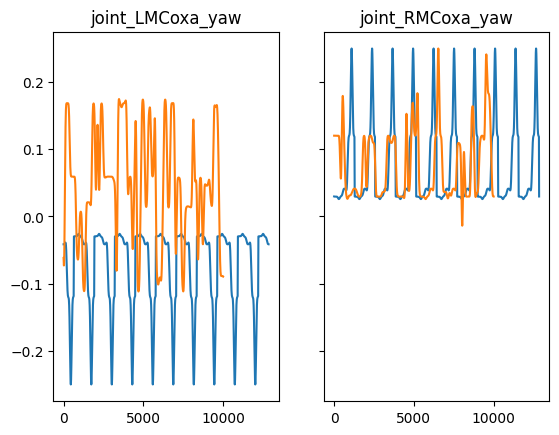

joint_LMFemur -1.9544781187778038 -1.8810831033526172
joint_LMFemur_roll 0.2940648834948227 0.3321681952460895
joint_LMTibia 1.865288723297878 1.5693177029124303
joint_LMTarsus1 -0.7395961450749066 -0.5395902085656371
joint_LHCoxa 0.41558540902405366 0.376135542437525
joint_LHCoxa_roll 2.5349903530075784 2.459475527093884
joint_LHCoxa_yaw -0.03188075709734684 0.021921107166152545


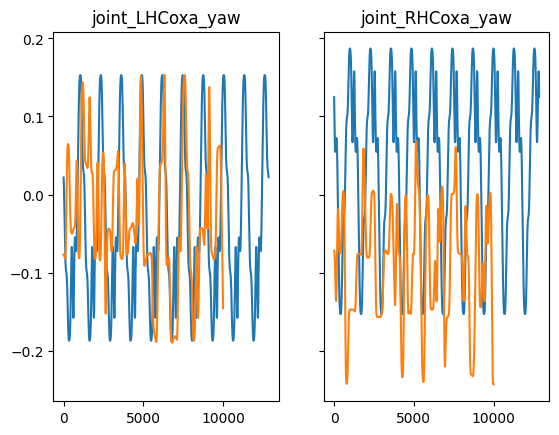

joint_LHFemur -1.8381908034414955 -2.1059636386993916
joint_LHFemur_roll 0.10026354212439506 0.10778545713575342
joint_LHTibia 1.844773564228458 2.232893644075144
joint_LHTarsus1 -0.508096578634069 -0.5514702831514446
joint_RFCoxa 0.5248183307716117 0.05232978656909404
joint_RFCoxa_roll -0.37276877740188363 -0.48317195631470855
joint_RFCoxa_yaw 0.36081027943223126 0.09322338349131822


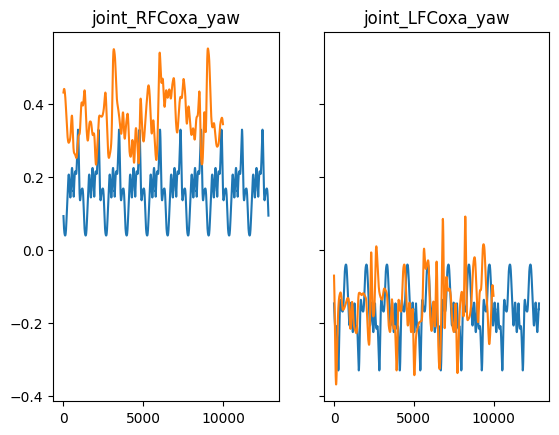

joint_RFFemur -2.2554433757172943 -1.5774340317201343
joint_RFFemur_roll -0.12331841234087547 -0.03053877841886815
joint_RFTibia 1.509229854640508 1.1375823614439753
joint_RFTarsus1 -0.8242975196033123 -0.67204054840902
joint_RMCoxa 0.04103196143235293 0.0021299940393221324
joint_RMCoxa_roll -1.549907211388227 -1.6721142217915994
joint_RMCoxa_yaw 0.07707280349390189 0.029753366800449436


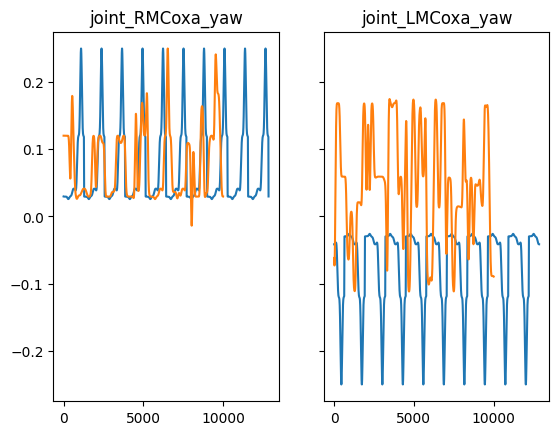

joint_RMFemur -1.9962485669724421 -1.943840200712773
joint_RMFemur_roll -0.31525429306785197 -0.05294122195774727
joint_RMTibia 1.7084949609574132 1.7024682603665142
joint_RMTarsus1 -0.6760609228136272 -0.7287434536162088
joint_RHCoxa 0.3113438021582602 0.4950549902860131
joint_RHCoxa_roll -1.9312238490657976 -2.6531774565425605
joint_RHCoxa_yaw -0.08786563554116227 0.12471789284252464


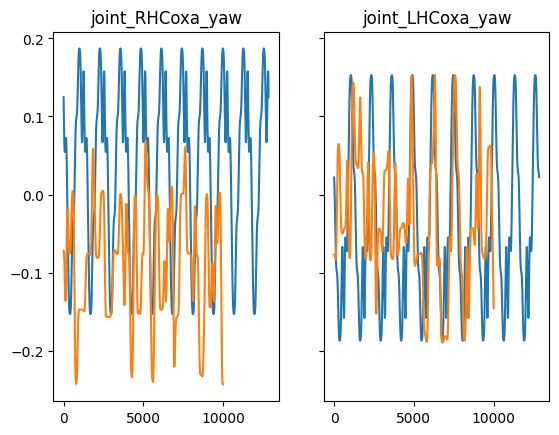

joint_RHFemur -1.8375808612486944 -1.5225550283601883
joint_RHFemur_roll 0.11435604426637329 -0.004149120388304704
joint_RHTibia 1.8996002099234843 1.308198286245169
joint_RHTarsus1 -0.5865564777899883 -0.3019542530069206


In [38]:
# Compare to mean joint angles
for i, joint in enumerate(kin_replay_leg_dofs):
    mean_joint_angle = np.mean(joint_angles[i])
    print(joint, mean_joint_angle, tripod_data[i][0])
    if "yaw" in joint:
        fig, ax = plt.subplots(1, 2, sharey=True)
        ax[0].plot(tripod_data[i])
        ax[0].plot(joint_angles[i])
        ax[0].set_title(joint)
        opp_joint = joint
        if "R" in joint:
            opp_joint = joint.replace("R", "L")
        else:
            opp_joint = joint.replace("L", "R")
        opp_index = kin_replay_leg_dofs.index(opp_joint)
        ax[1].set_title(opp_joint)
        ax[1].plot(tripod_data[opp_index])
        ax[1].plot(joint_angles[opp_index])
        plt.show()

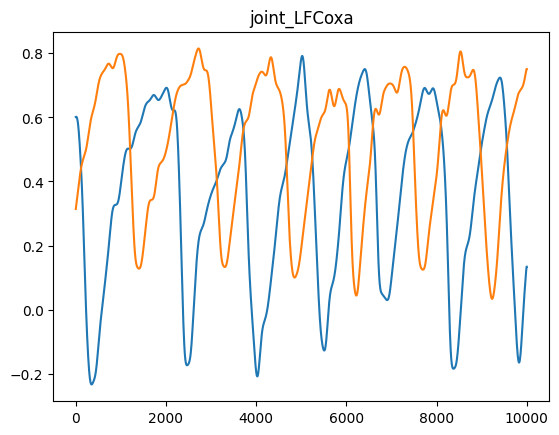

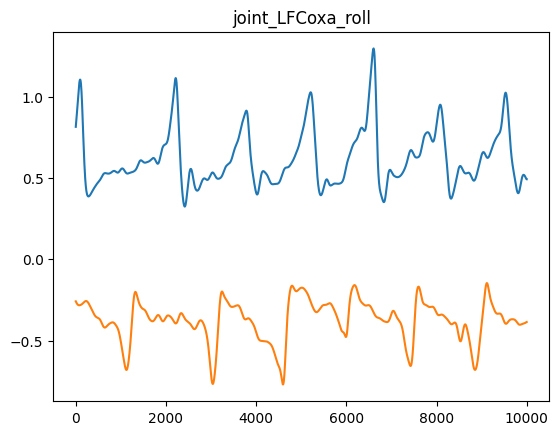

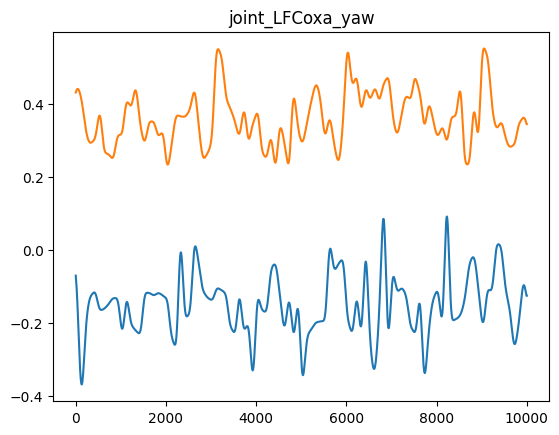

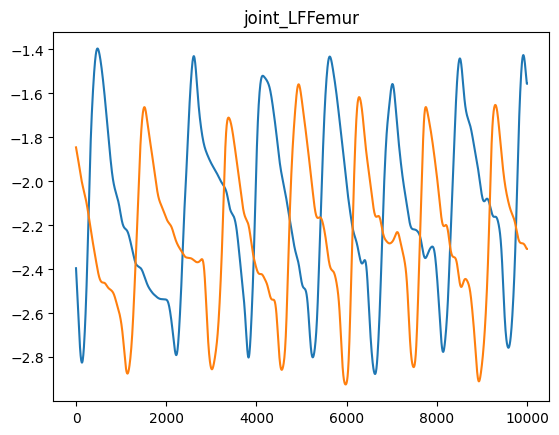

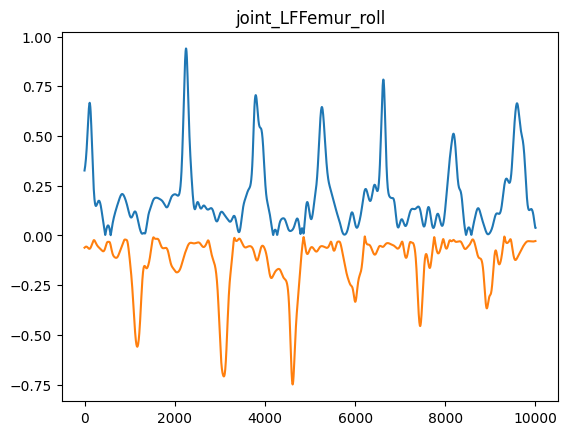

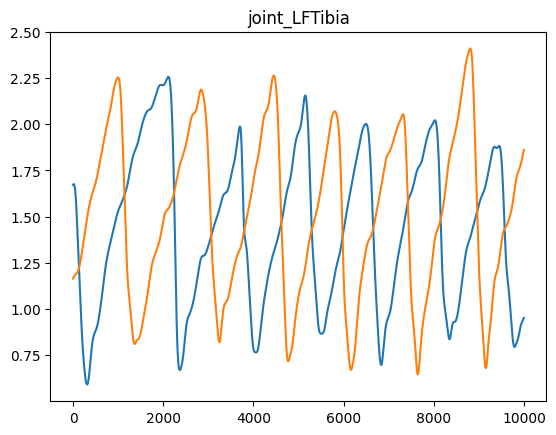

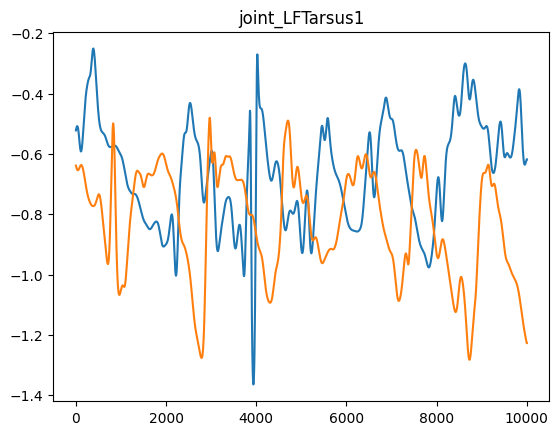

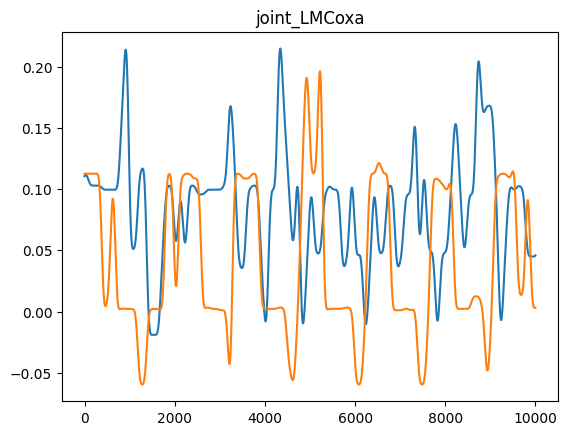

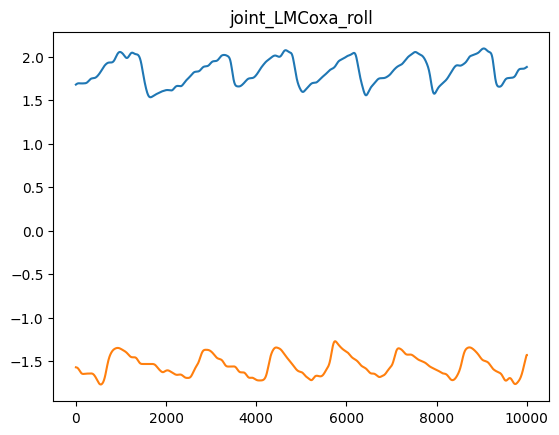

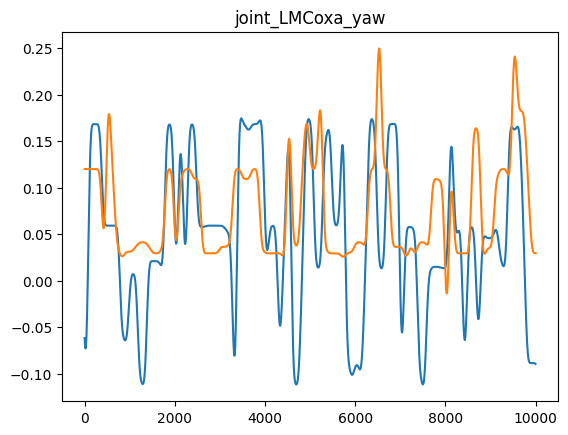

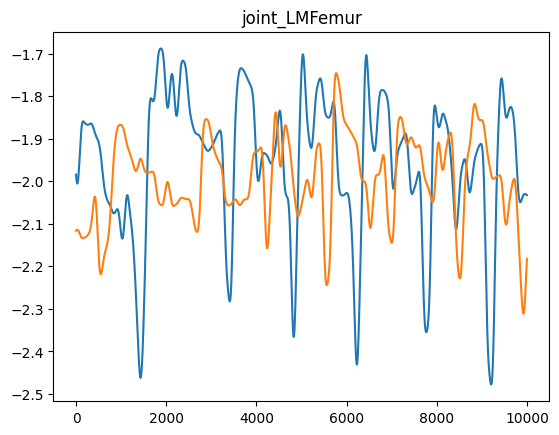

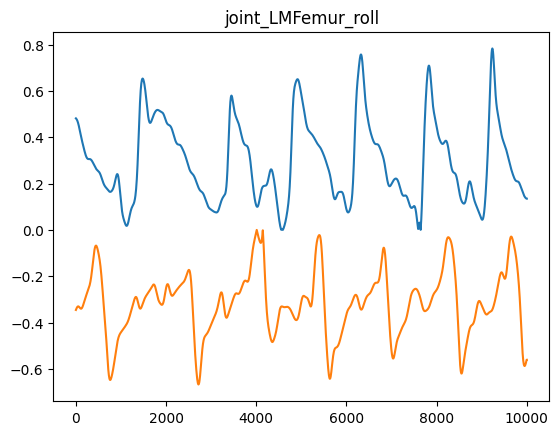

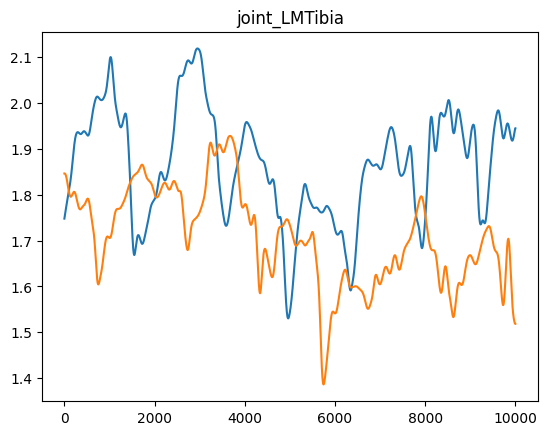

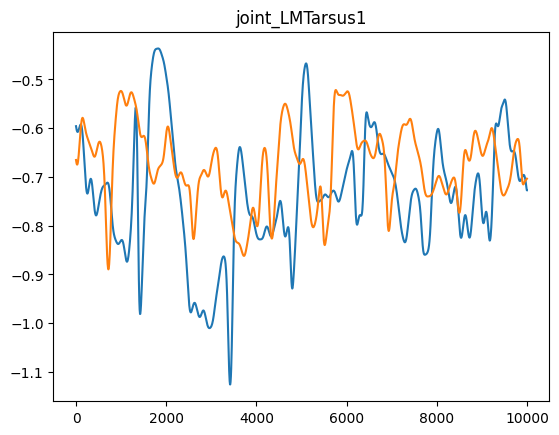

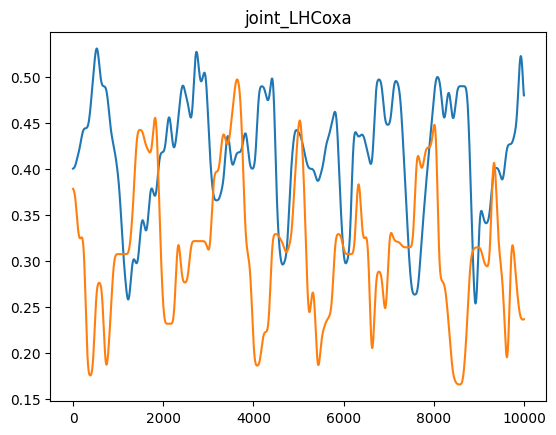

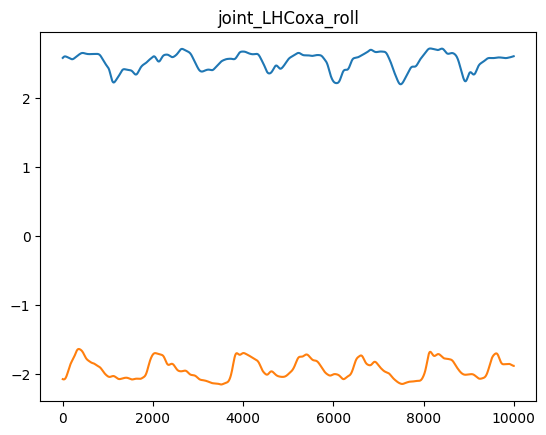

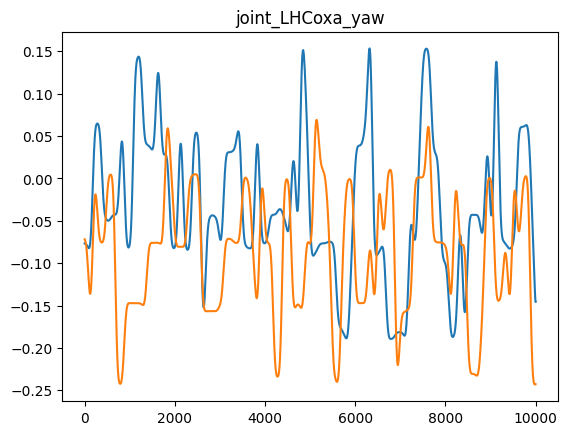

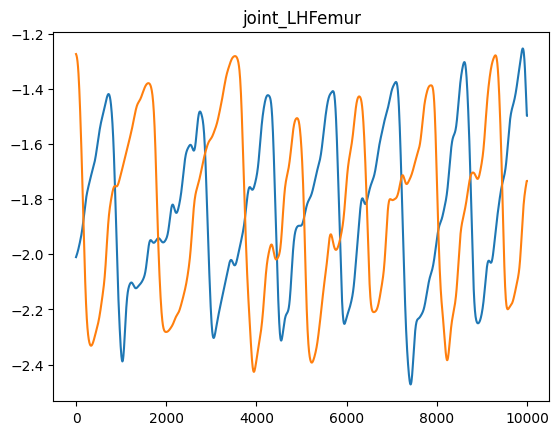

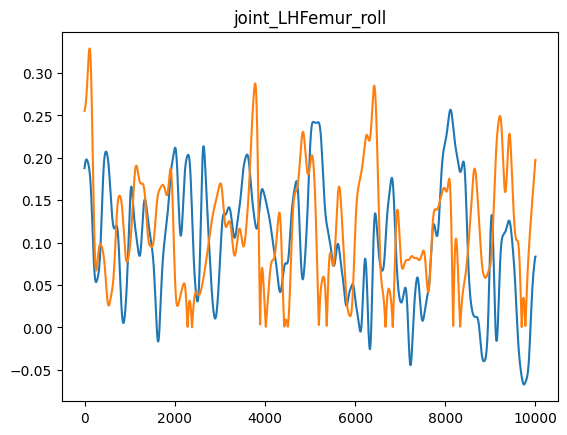

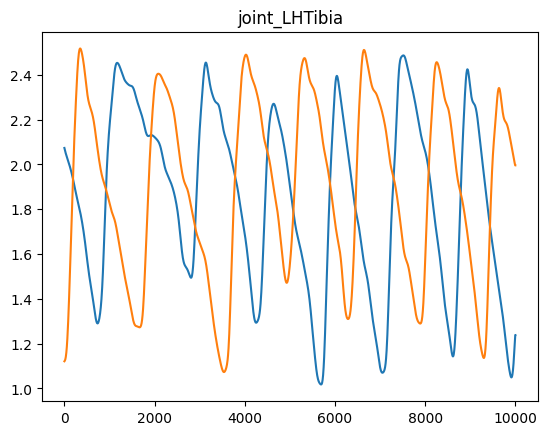

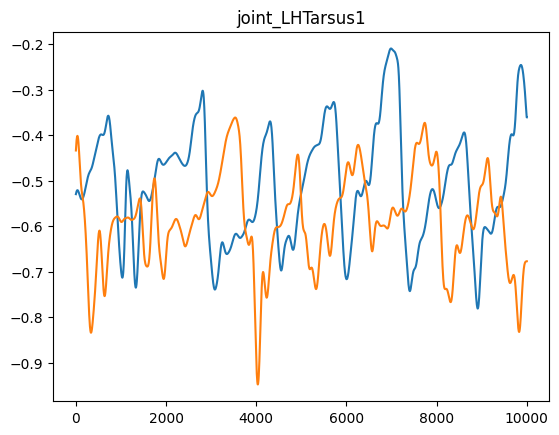

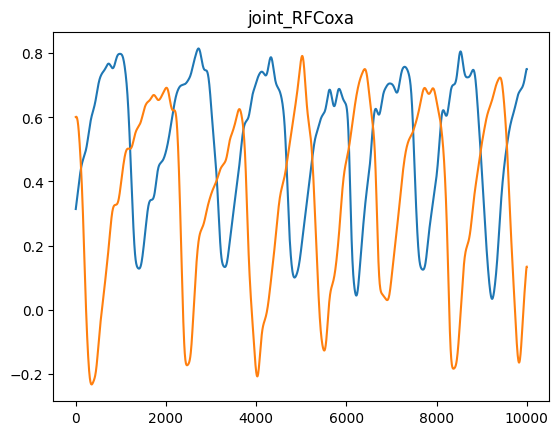

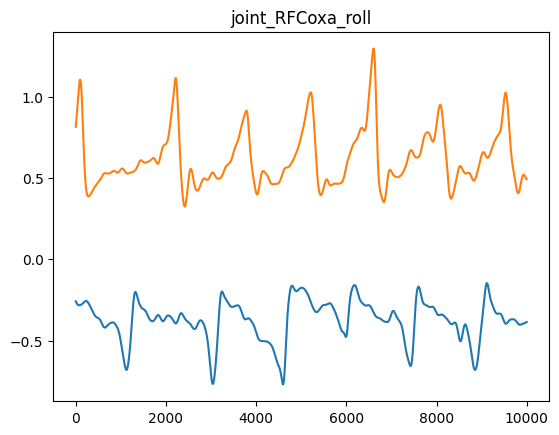

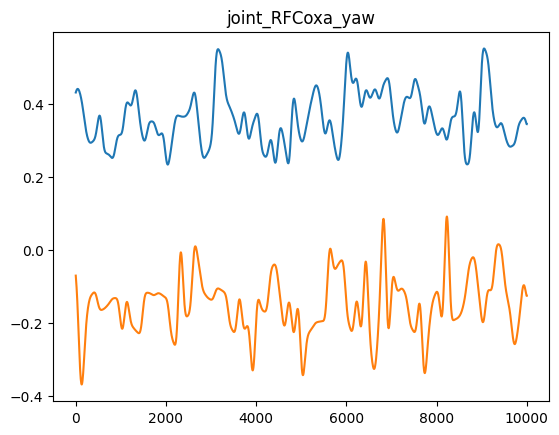

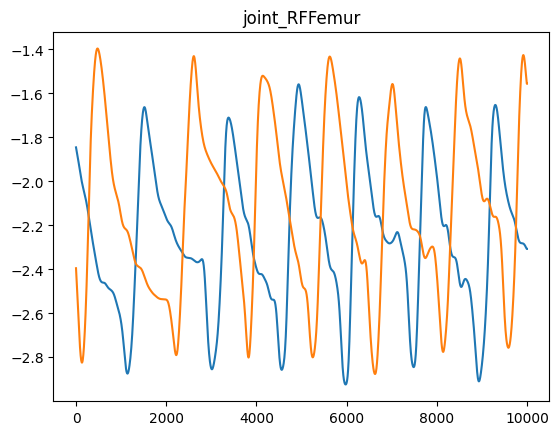

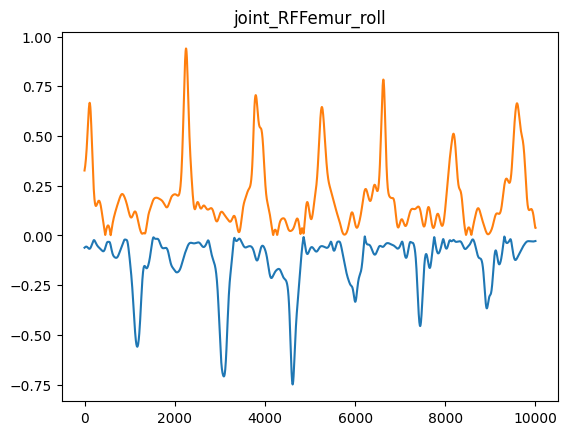

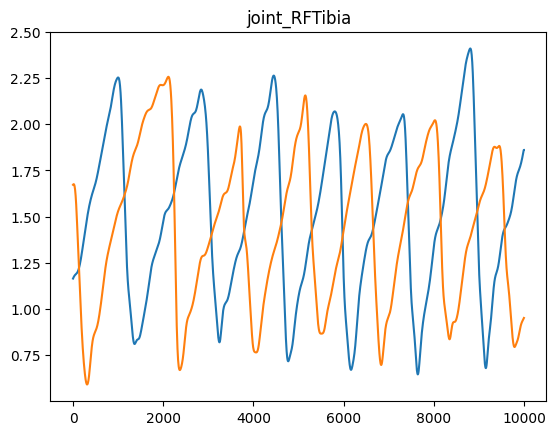

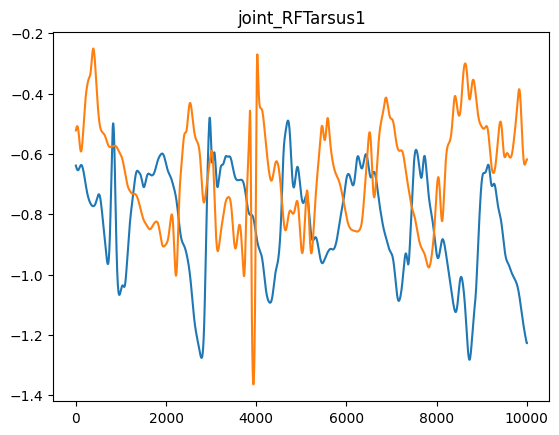

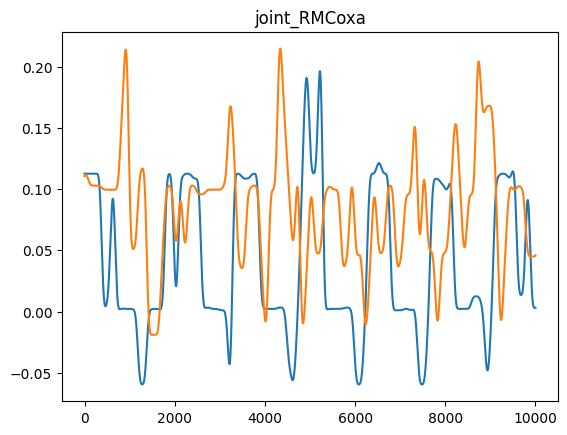

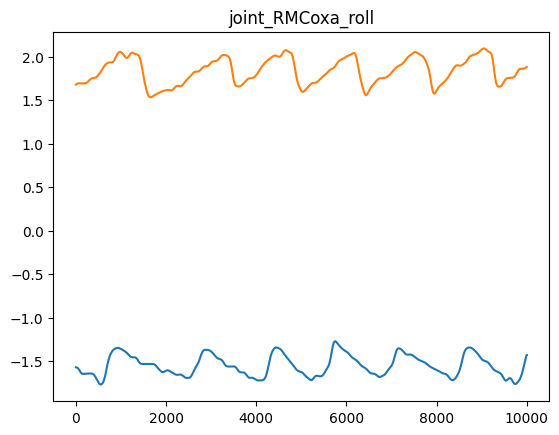

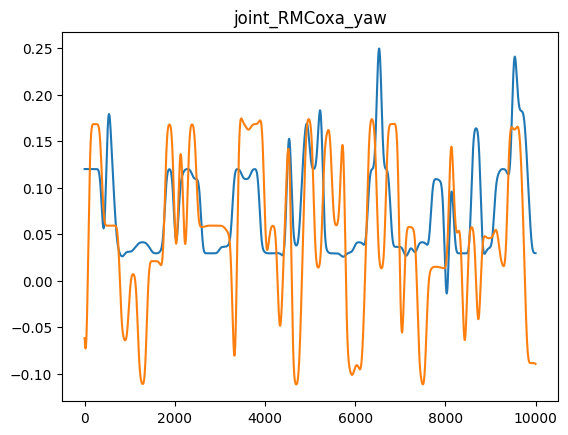

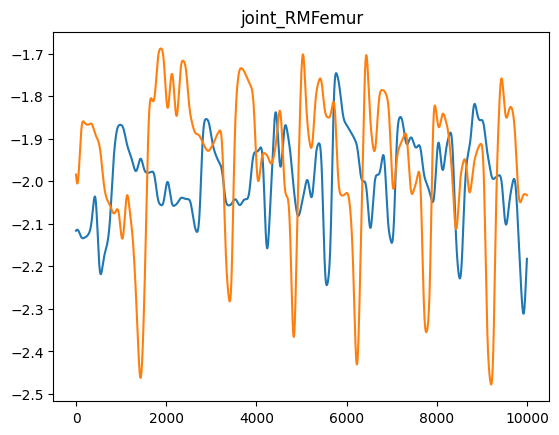

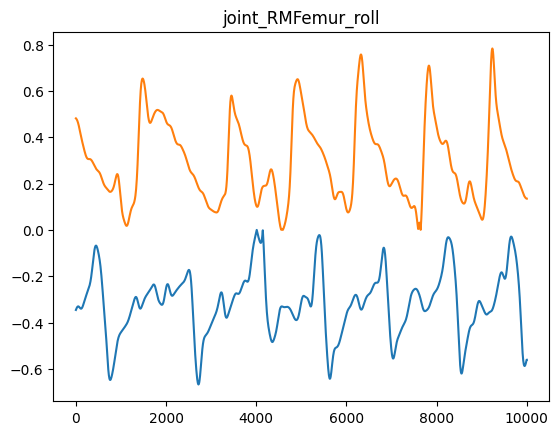

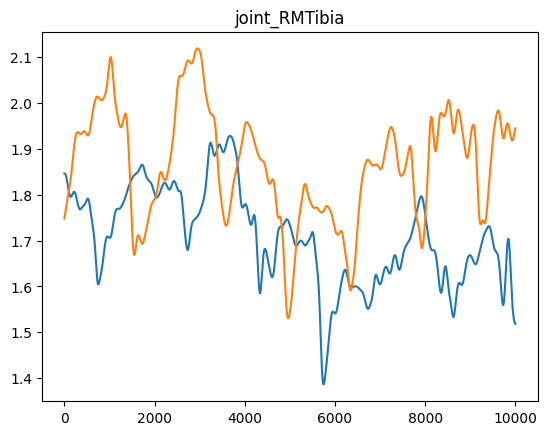

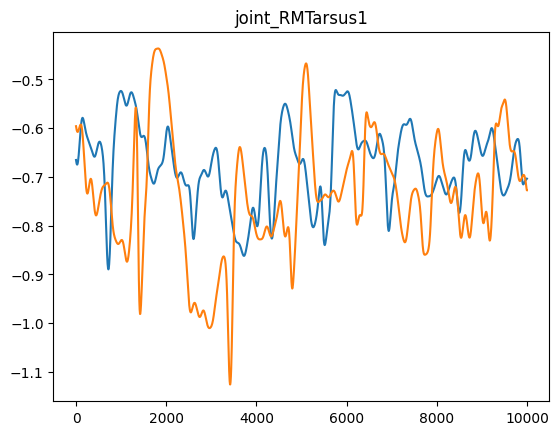

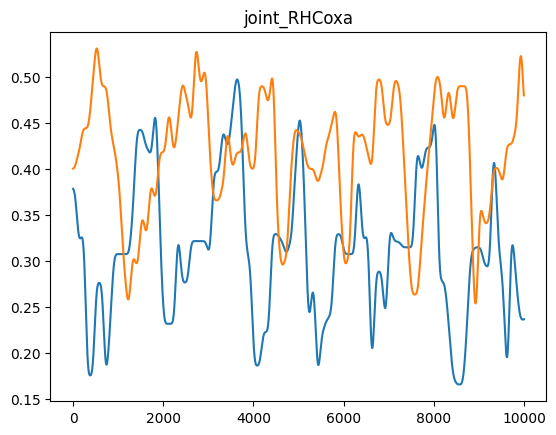

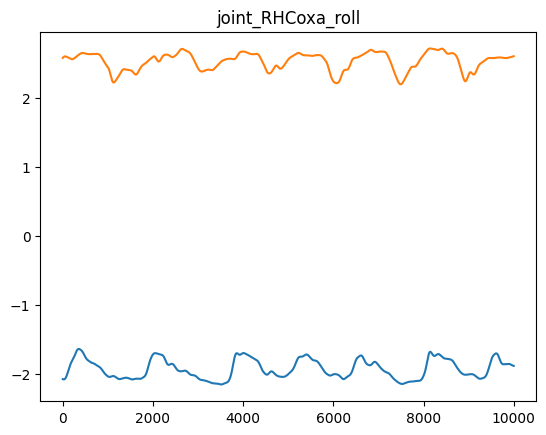

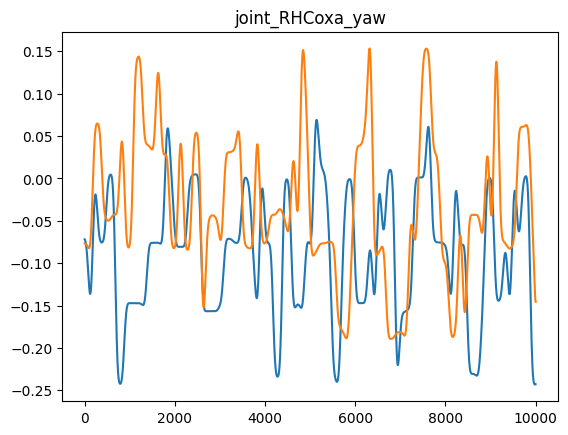

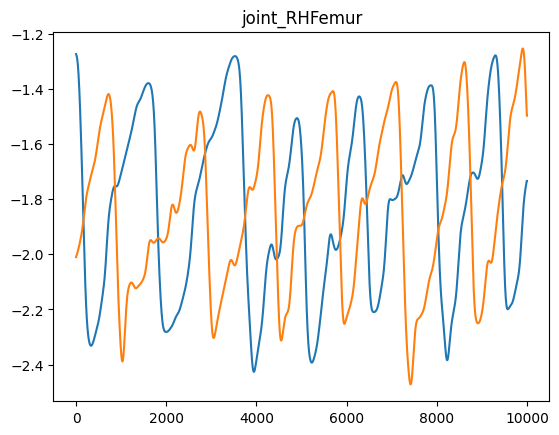

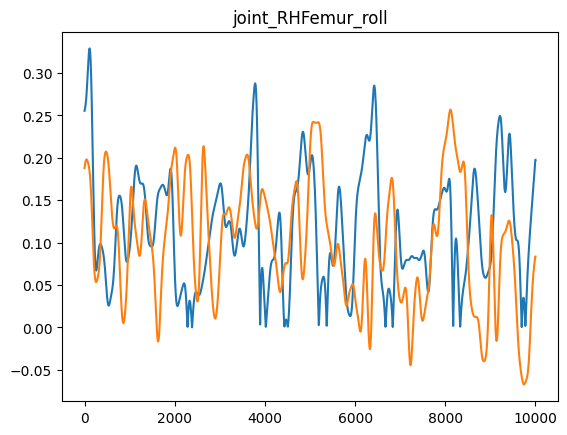

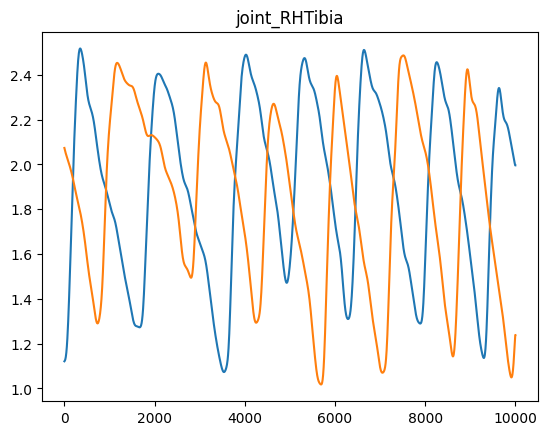

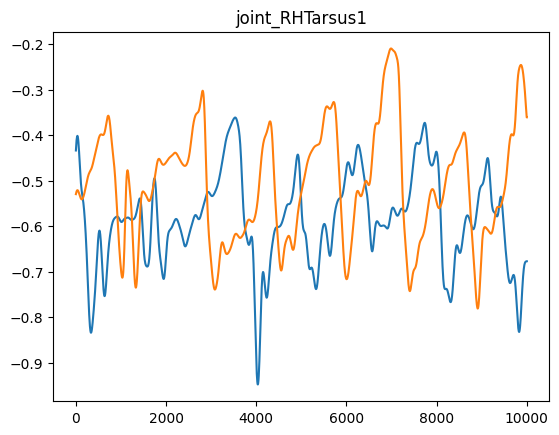

In [39]:
# Compare to mean joint angles
for i, joint in enumerate(kin_replay_leg_dofs):
    plt.plot(joint_angles[i])
    if "R" in joint:
        plt.plot(joint_angles[kin_replay_leg_dofs.index(joint.replace("R", "L"))])
    else:
        plt.plot(joint_angles[kin_replay_leg_dofs.index(joint.replace("L", "R"))])
    plt.title(joint)
    plt.show()

In [40]:
# Build corrected tripod data
"""corrected_joint_angles_tripod_data = []
for i, joint in enumerate(kin_replay_leg_dofs):
    mean_joint_angle = np.mean(joint_angles[i])
    if np.sign(tripod_data[i][0]) == np.sign(mean_joint_angle):
        corrected_joint_angles_tripod_data.append(tripod_data[i])
    else:
        corrected_joint_angles_tripod_data.append(-1*tripod_data[i])
plt.plot(np.transpose(corrected_joint_angles_tripod_data))
plt.show()"""

'corrected_joint_angles_tripod_data = []\nfor i, joint in enumerate(kin_replay_leg_dofs):\n    mean_joint_angle = np.mean(joint_angles[i])\n    if np.sign(tripod_data[i][0]) == np.sign(mean_joint_angle):\n        corrected_joint_angles_tripod_data.append(tripod_data[i])\n    else:\n        corrected_joint_angles_tripod_data.append(-1*tripod_data[i])\nplt.plot(np.transpose(corrected_joint_angles_tripod_data))\nplt.show()'

In [41]:
final_tripod_engineered_dict = {"meta":{"timestep":0.0001,
                                        "source":"Analyze_step_data.ipynb"}}
for i, joint in  enumerate(kin_replay_leg_dofs):
    final_tripod_engineered_dict[joint] = tripod_data[i]

In [44]:
with open(data_path / "tripod_engineered.pkl", 'wb') as destination:
    pickle.dump(final_tripod_engineered_dict, destination)

In [45]:
# Generate single step data for each leg 

all_joints_single_step_data = {"meta":{"timestep":0.0001,
                                       "source":"Analyze_step_data.ipynb"}
}

sides_taken = [key[7:9] for key in keypoints_taken]
for i, joint in enumerate(kin_replay_leg_dofs):
    reference_data = step_joint_data_interpolated[stepping_joint.index(joint[7:])]
    if not joint[6:8] in sides_taken and ("roll" in joint or "yaw" in joint):
        print(joint)
        reference_data = -1*reference_data

    """if np.sign(reference_data[0]) == np.sign(np.mean(joint_angles[i])):
        all_joints_single_step_data[joint] = reference_data    
    else:
        print(joint)
        all_joints_single_step_data[joint] = -1*reference_data"""
    all_joints_single_step_data[joint] = reference_data

joint_LMCoxa_roll
joint_LMCoxa_yaw
joint_LMFemur_roll
joint_RFCoxa_roll
joint_RFCoxa_yaw
joint_RFFemur_roll
joint_RHCoxa_roll
joint_RHCoxa_yaw
joint_RHFemur_roll


In [46]:
stepping_joint

['FCoxa',
 'FCoxa_roll',
 'FCoxa_yaw',
 'FFemur',
 'FFemur_roll',
 'FTibia',
 'FTarsus1',
 'HCoxa',
 'HCoxa_roll',
 'HCoxa_yaw',
 'HFemur',
 'HFemur_roll',
 'HTibia',
 'HTarsus1',
 'MCoxa',
 'MCoxa_roll',
 'MCoxa_yaw',
 'MFemur',
 'MFemur_roll',
 'MTibia',
 'MTarsus1']

In [47]:
joint[7:9]

'HT'

In [49]:
with open(data_path / "single_steps.pkl", 'wb') as destination:
    pickle.dump(all_joints_single_step_data, destination)

# Compare with flygym data

In [50]:
import pkg_resources

data_path = Path(pkg_resources.resource_filename("flygym", "data"))
with open(data_path / "behavior" / "single_steps.pkl", "rb") as f:
    data = pickle.load(f)

meta


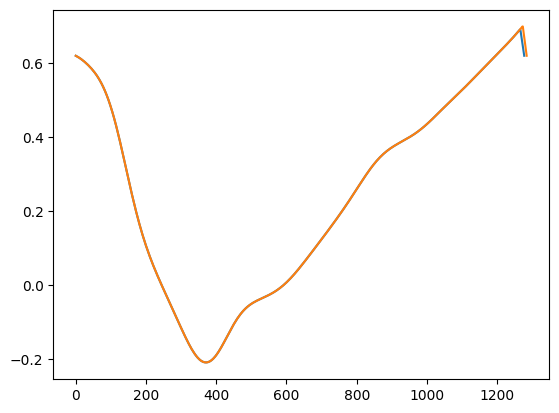

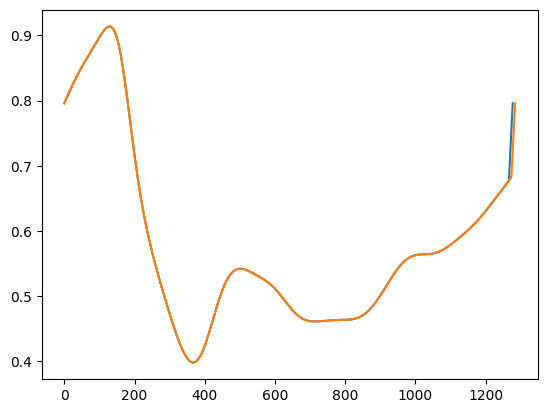

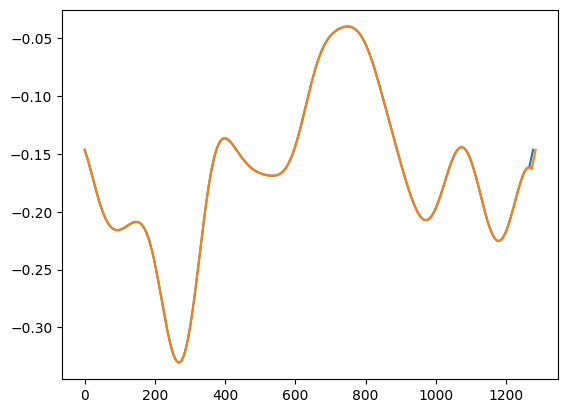

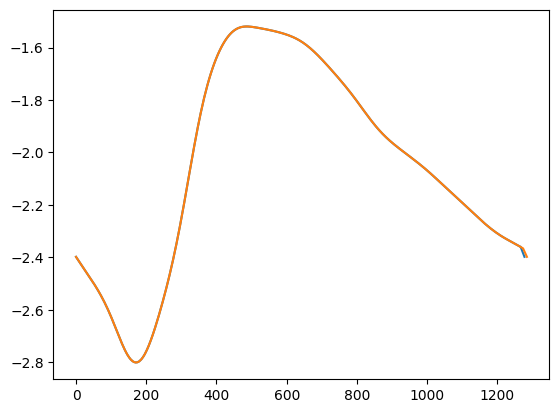

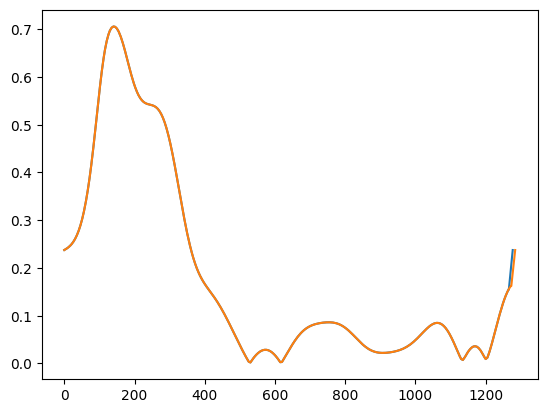

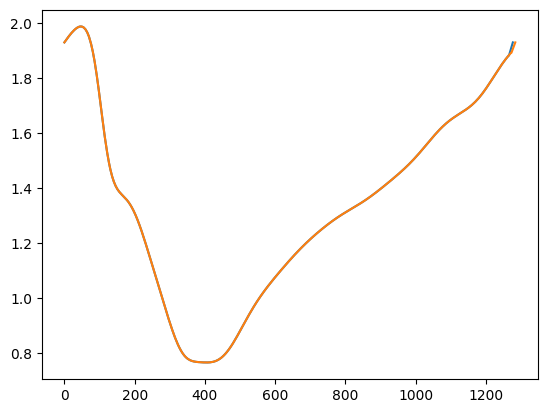

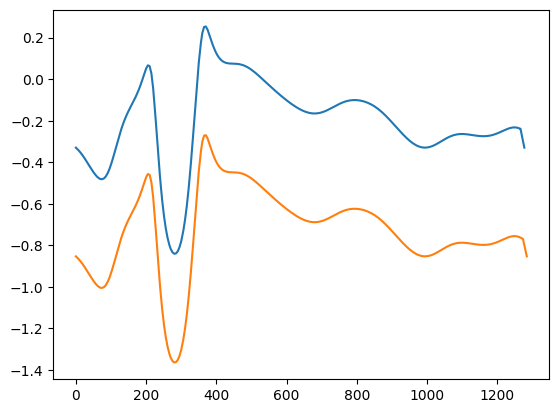

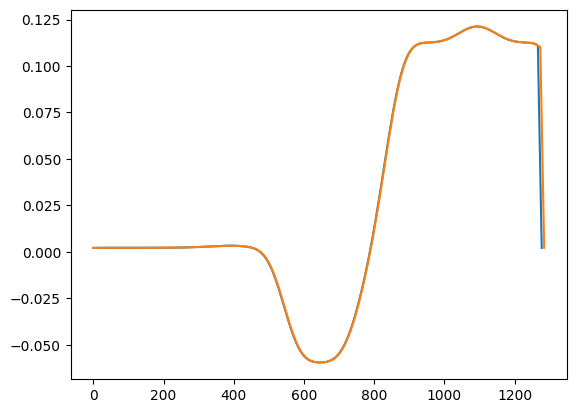

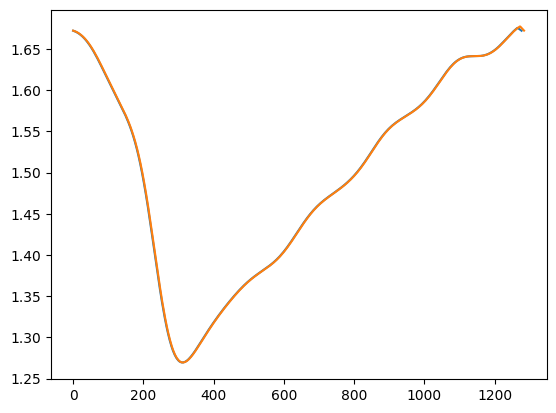

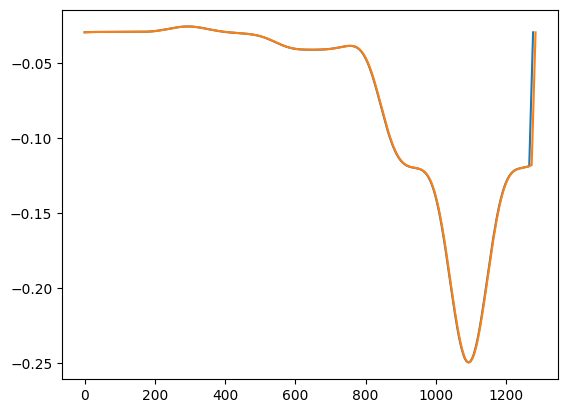

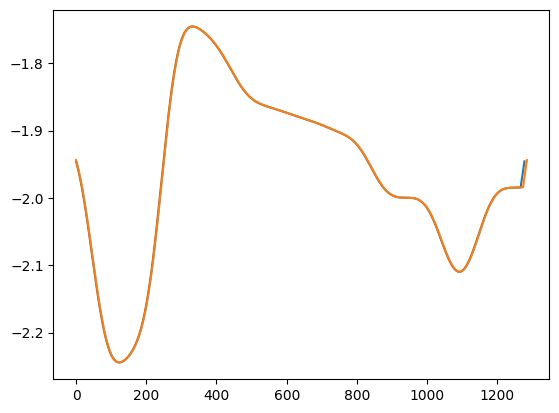

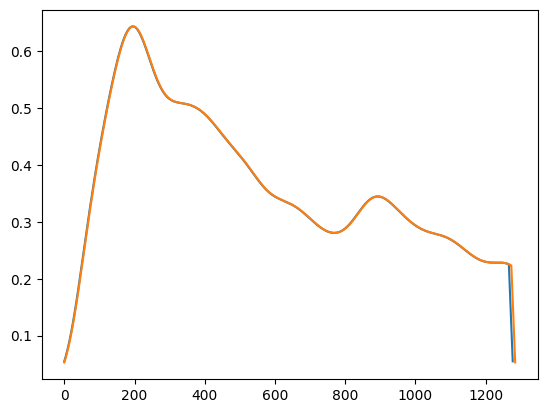

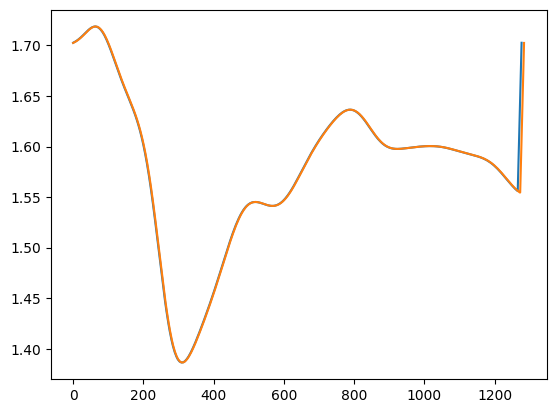

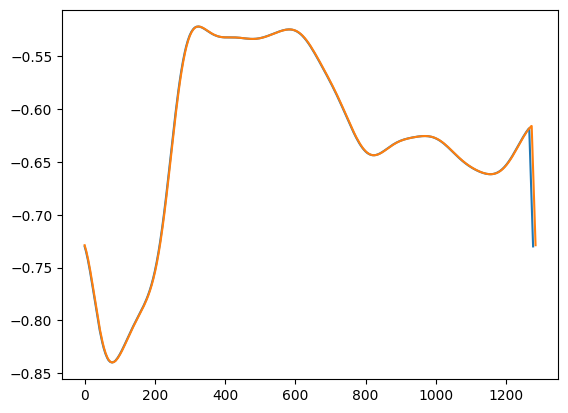

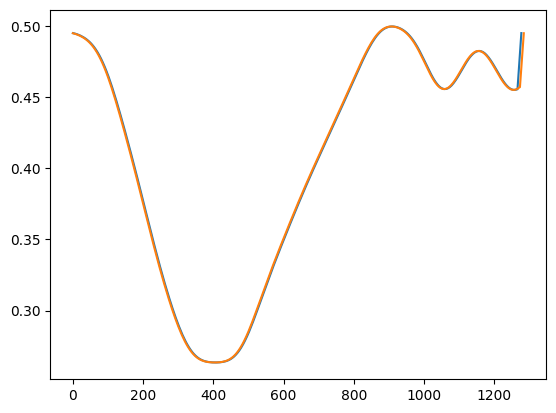

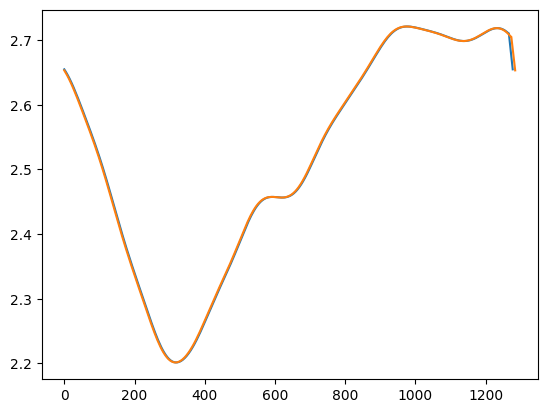

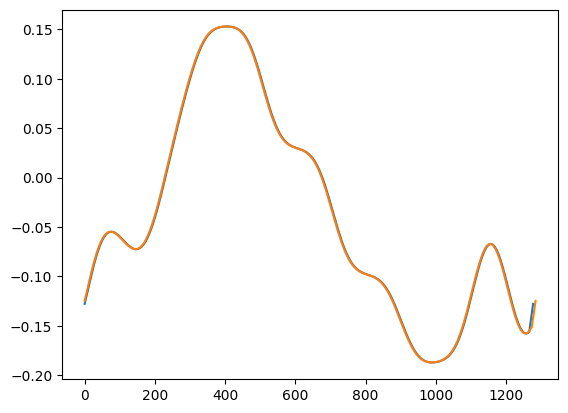

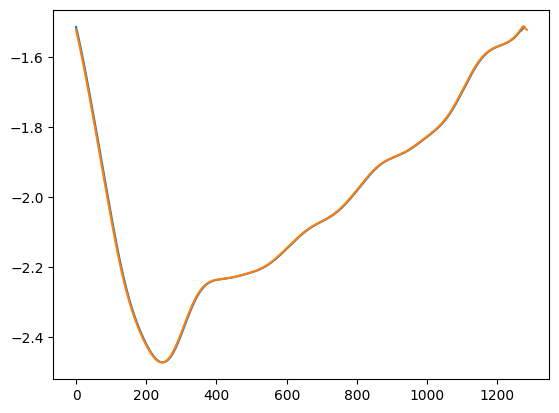

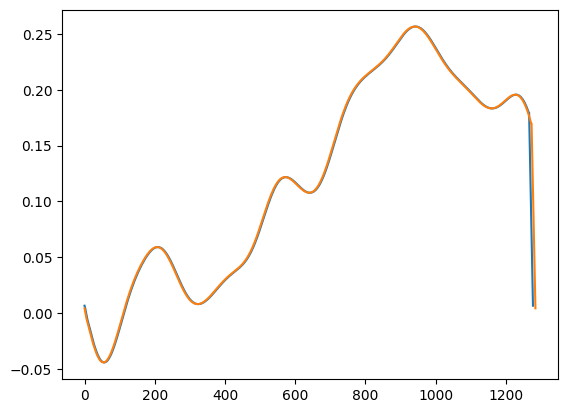

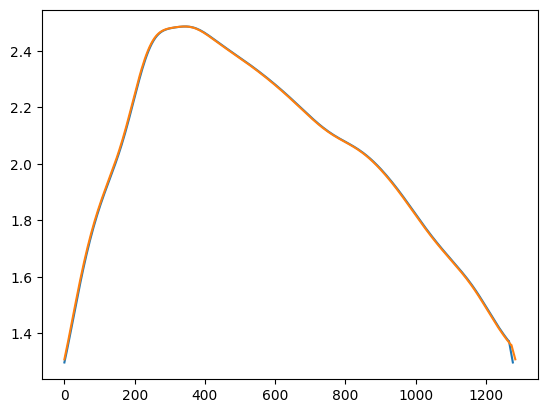

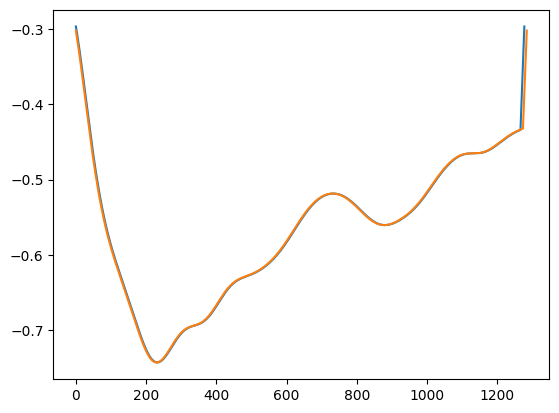

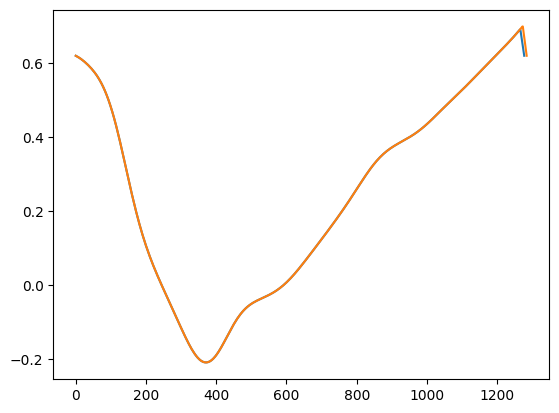

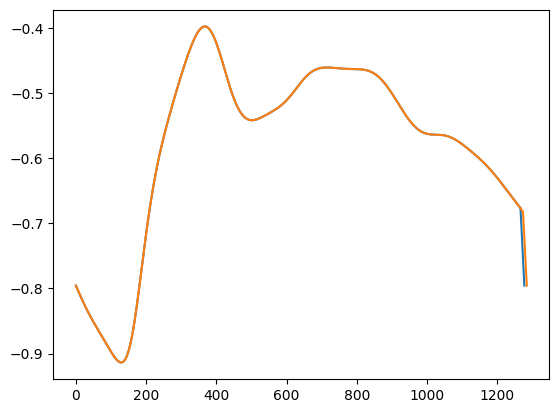

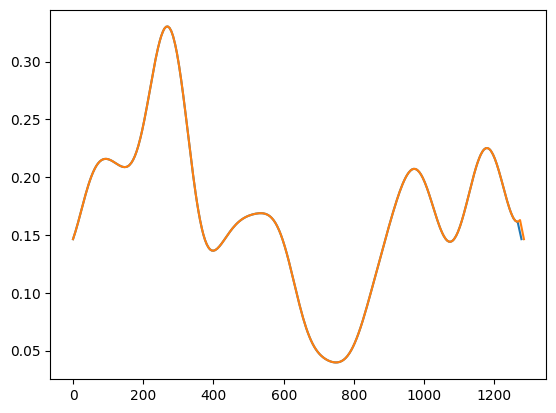

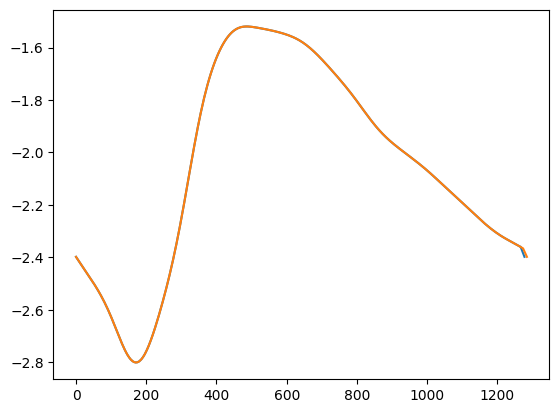

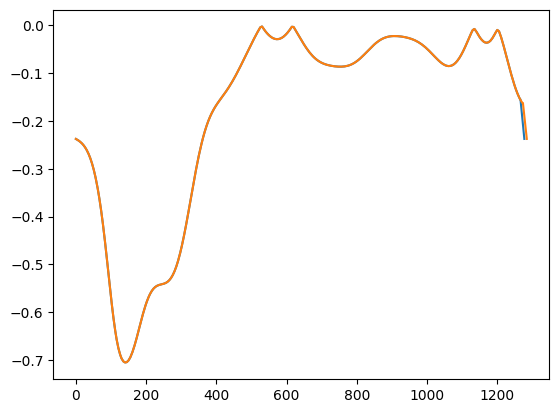

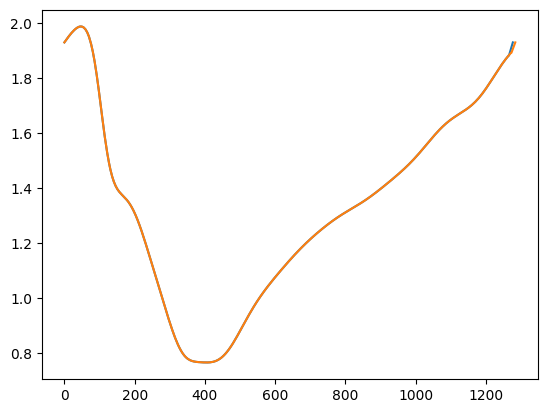

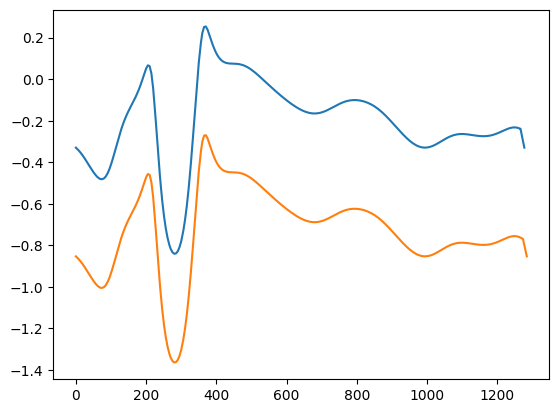

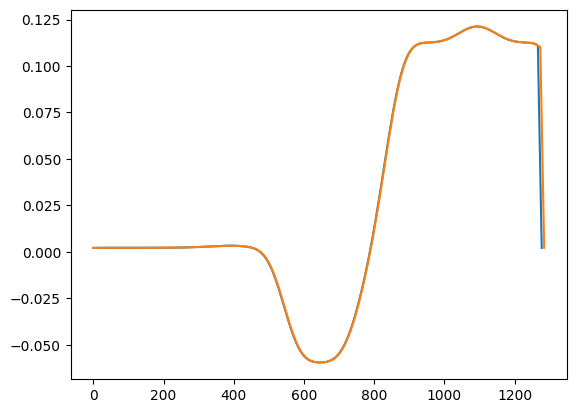

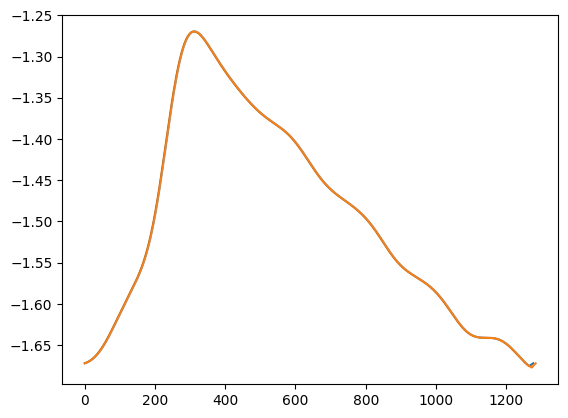

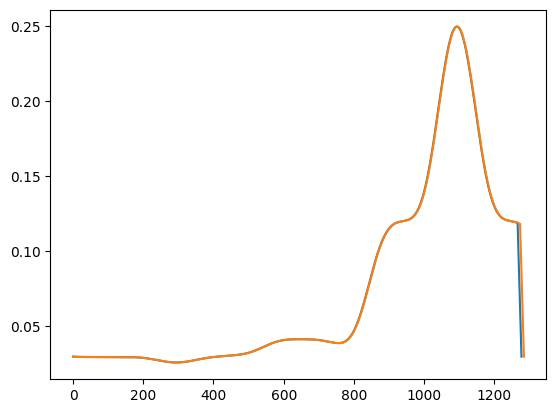

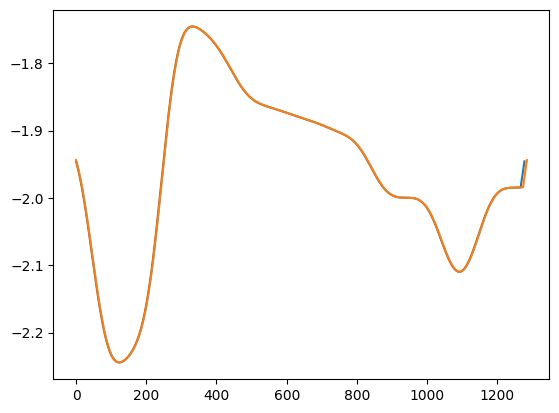

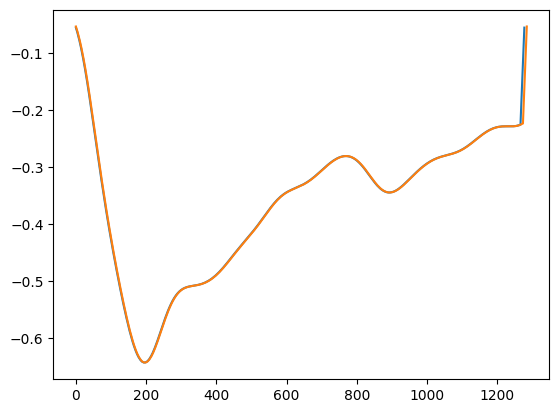

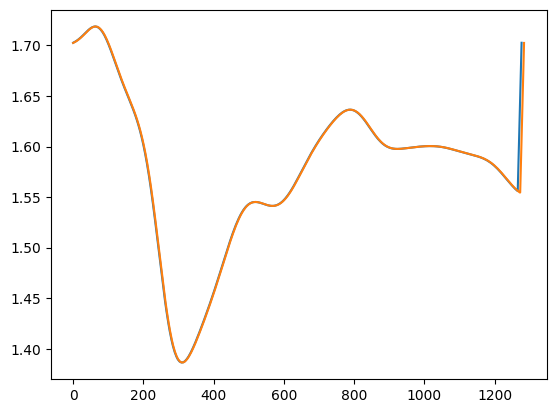

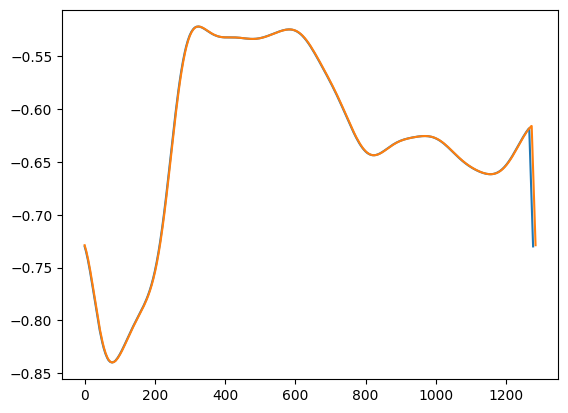

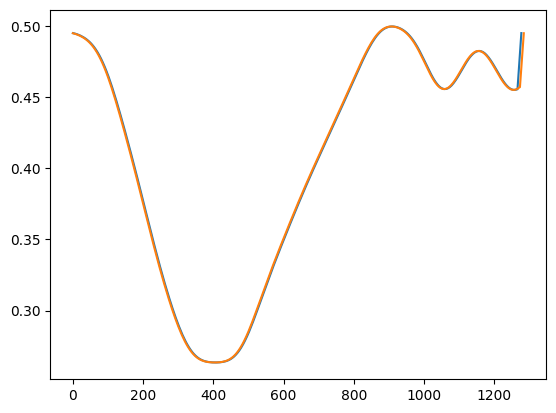

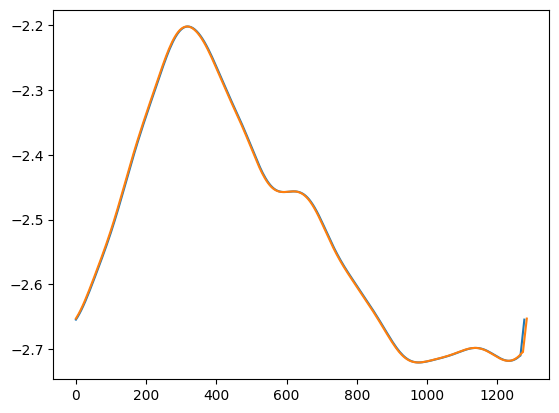

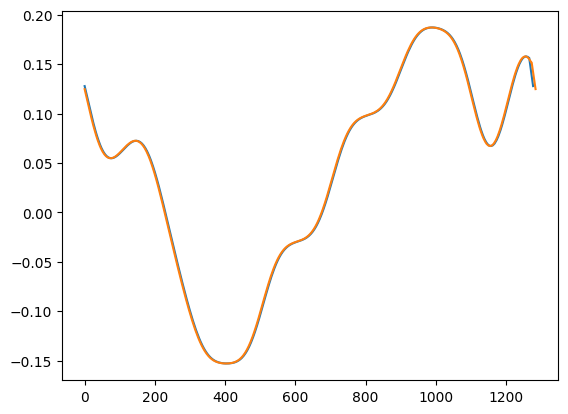

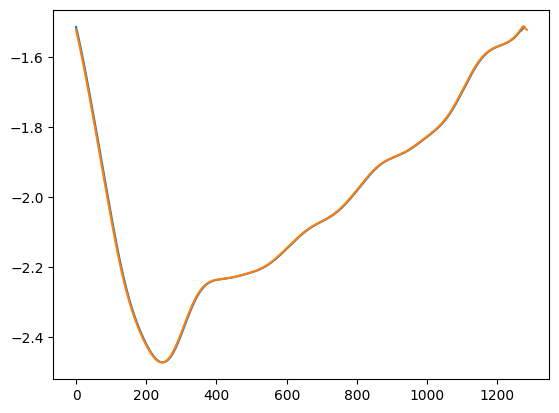

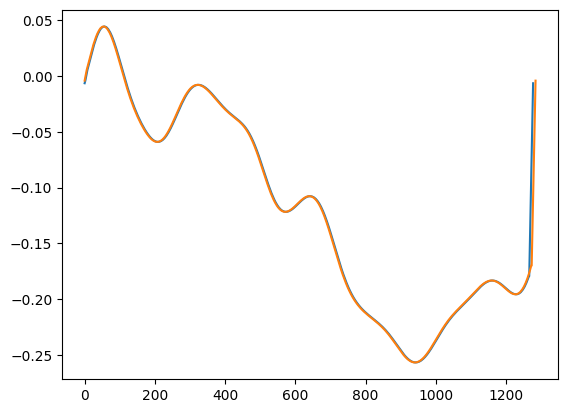

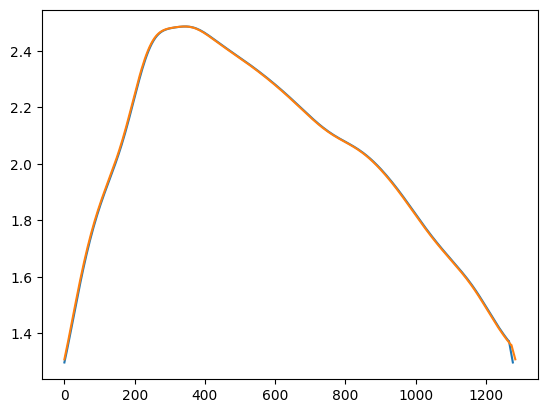

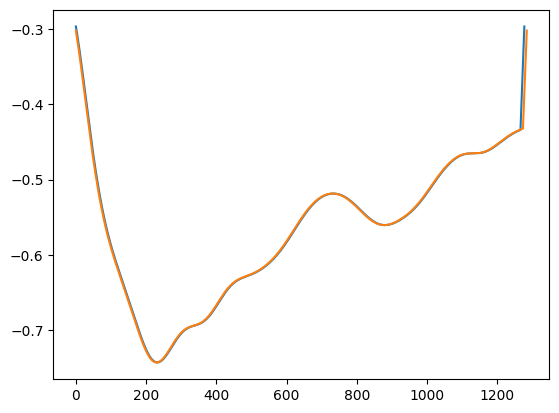

swing_stance_time


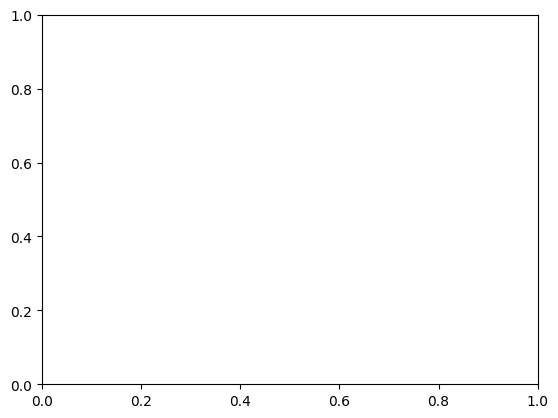

In [54]:
for k in data.keys():
    try:
        plt.plot(data[k])
        plt.plot(all_joints_single_step_data[k])
        plt.show()
    except TypeError:
        print(k)